<a href="https://colab.research.google.com/github/Honeson/ANN/blob/main/SupervisedDBNRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/albertbup/deep-belief-network.git


Cloning into 'deep-belief-network'...
remote: Enumerating objects: 795, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 795 (delta 13), reused 7 (delta 2), pack-reused 763
Receiving objects: 100% (795/795), 181.17 KiB | 2.83 MiB/s, done.
Resolving deltas: 100% (459/459), done.


In [3]:
cd deep-belief-network

/content/deep-belief-network


In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from dbn import SupervisedDBNRegression
#%matplotlib inline

In [5]:
# The data

url = 'https://raw.githubusercontent.com/Honeson/ANN-qos_qoe/main/QoS/working_qos_data.csv'

In [6]:
# Prevent numpy warning and removing pandas limit constraint

np.seterr(over='ignore')
pd.set_option('display.max_columns', None)

In [7]:
# Loading the data into a pandas dataframe for easy manipulation

df = pd.read_csv(url)

In [8]:
df.describe()

#RequestID     NbClients  BottleneckBW  BottleneckDelay  \
count  69129.000000  69129.000000  6.912900e+04     69129.000000   
mean      26.269438     55.791477  2.616060e+08        36.089615   
std       19.403130     20.368601  1.827508e+08        22.842334   
min        1.000000      1.000000  5.000000e+05         1.000000   
25%       10.000000     41.000000  1.029500e+08        21.000000   
50%       22.000000     61.000000  2.378500e+08        41.000000   
75%       39.000000     71.000000  3.782000e+08        61.000000   
max       81.000000     81.000000  7.330500e+08        71.000000   

       BottleneckLoss  ClientResolution  RequestDuration  TCPOutputPacket  \
count    69129.000000      6.912900e+04          69129.0     69129.000000   
mean         0.008233      6.578972e+06             70.0      9043.195663   
std          0.007950      8.420881e+06              0.0      7692.084952   
min          0.000000      6.403600e+05             70.0       567.000000   
25%          0.000000      6.403600e+05             70.0      2504.000000   
50%          0.010000      1.280720e+06             70.0      5410.000000   
75%          0.010000      1.920108e+07             70.0     14585.000000   
max          0.020000      1.920108e+07             70.0     30995.000000   

       TCPOutputDelay  TCPOutputJitter  TCPOutputPloss  TCPInputPacket  \
count    69129.000000     69129.000000    69129.000000    69129.000000   
mean        36.109935         0.001916        0.008196    16869.973238   
std         22.842551         0.004691        0.008103    14791.974796   
min          1.015090         0.000209        0.000000     1024.000000   
25%         21.015200         0.000395        0.000000     4409.000000   
50%         41.015200         0.001084        0.008867     9701.000000   
75%         61.015200         0.002314        0.013369    27232.000000   
max         72.007100         0.249556        0.034549    53993.000000   

       TCPInputDelay  TCPInputJitter  TCPInputPloss  TCPInputRetrans  \
count   69129.000000    69129.000000   69129.000000     69129.000000   
mean       61.104067        0.630007       0.010595         9.088689   
std        57.652615        0.926380       0.007264        12.116729   
min         2.120480        0.345681       0.000000         1.000000   
25%        31.729000        0.391770       0.004065         3.000000   
50%        51.808900        0.431842       0.009981         4.000000   
75%        71.949000        0.517766       0.017418        10.000000   
max       862.293000       45.039100       0.056137       177.000000   

       StdInputRate  0_InputRateVariation  5_InputRateVariation  \
count  6.912900e+04          6.912900e+04          6.912900e+04   
mean   2.607036e+05          4.577874e+04          4.577890e+04   
std    2.231213e+05          1.135991e+05          1.135990e+05   
min    1.690640e+04          5.200000e+01          5.200000e+01   
25%    8.136450e+04          1.560000e+03          1.560000e+03   
50%    1.699000e+05          5.901000e+03          5.901000e+03   
75%    3.948650e+05          3.350400e+04          3.350400e+04   
max    1.570000e+06          1.461636e+06          1.461636e+06   

       10_InputRateVariation  25_InputRateVariation  50_InputRateVariation  \
count           6.912900e+04           6.912900e+04           6.912900e+04   
mean            3.026289e+05           5.085140e+05           6.604457e+05   
std             3.563223e+05           4.915897e+05           5.964772e+05   
min             1.340000e+02           1.602400e+04           3.630000e+04   
25%             5.151400e+04           1.148830e+05           1.628100e+05   
50%             1.364800e+05           2.802360e+05           3.702600e+05   
75%             4.452880e+05           8.087640e+05           1.063399e+06   
max             2.019668e+06           2.264766e+06           2.581170e+06   

       75_InputRateVariation  90_InputRateVariation  95_InputRateVariation  \
c

In [11]:
# Dropping this column

df.drop('DASHPolicy', axis=1, inplace=True)

In [12]:
# converting all the categorical data in our dataframe into numbers. We can't feed in categories to NN, we must convert it first.

cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

In [13]:
df.describe()

#RequestID     NbClients  BottleneckBW  BottleneckDelay  \
count  69129.000000  69129.000000  6.912900e+04     69129.000000   
mean      26.269438     55.791477  2.616060e+08        36.089615   
std       19.403130     20.368601  1.827508e+08        22.842334   
min        1.000000      1.000000  5.000000e+05         1.000000   
25%       10.000000     41.000000  1.029500e+08        21.000000   
50%       22.000000     61.000000  2.378500e+08        41.000000   
75%       39.000000     71.000000  3.782000e+08        61.000000   
max       81.000000     81.000000  7.330500e+08        71.000000   

       BottleneckLoss  ClientResolution  RequestDuration  TCPOutputPacket  \
count    69129.000000      6.912900e+04          69129.0     69129.000000   
mean         0.008233      6.578972e+06             70.0      9043.195663   
std          0.007950      8.420881e+06              0.0      7692.084952   
min          0.000000      6.403600e+05             70.0       567.000000   
25%          0.000000      6.403600e+05             70.0      2504.000000   
50%          0.010000      1.280720e+06             70.0      5410.000000   
75%          0.010000      1.920108e+07             70.0     14585.000000   
max          0.020000      1.920108e+07             70.0     30995.000000   

       TCPOutputDelay  TCPOutputJitter  TCPOutputPloss  TCPInputPacket  \
count    69129.000000     69129.000000    69129.000000    69129.000000   
mean        36.109935         0.001916        0.008196    16869.973238   
std         22.842551         0.004691        0.008103    14791.974796   
min          1.015090         0.000209        0.000000     1024.000000   
25%         21.015200         0.000395        0.000000     4409.000000   
50%         41.015200         0.001084        0.008867     9701.000000   
75%         61.015200         0.002314        0.013369    27232.000000   
max         72.007100         0.249556        0.034549    53993.000000   

       TCPInputDelay  TCPInputJitter  TCPInputPloss  TCPInputRetrans  \
count   69129.000000    69129.000000   69129.000000     69129.000000   
mean       61.104067        0.630007       0.010595         9.088689   
std        57.652615        0.926380       0.007264        12.116729   
min         2.120480        0.345681       0.000000         1.000000   
25%        31.729000        0.391770       0.004065         3.000000   
50%        51.808900        0.431842       0.009981         4.000000   
75%        71.949000        0.517766       0.017418        10.000000   
max       862.293000       45.039100       0.056137       177.000000   

       StdInputRate  0_InputRateVariation  5_InputRateVariation  \
count  6.912900e+04          6.912900e+04          6.912900e+04   
mean   2.607036e+05          4.577874e+04          4.577890e+04   
std    2.231213e+05          1.135991e+05          1.135990e+05   
min    1.690640e+04          5.200000e+01          5.200000e+01   
25%    8.136450e+04          1.560000e+03          1.560000e+03   
50%    1.699000e+05          5.901000e+03          5.901000e+03   
75%    3.948650e+05          3.350400e+04          3.350400e+04   
max    1.570000e+06          1.461636e+06          1.461636e+06   

       10_InputRateVariation  25_InputRateVariation  50_InputRateVariation  \
count           6.912900e+04           6.912900e+04           6.912900e+04   
mean            3.026289e+05           5.085140e+05           6.604457e+05   
std             3.563223e+05           4.915897e+05           5.964772e+05   
min             1.340000e+02           1.602400e+04           3.630000e+04   
25%             5.151400e+04           1.148830e+05           1.628100e+05   
50%             1.364800e+05           2.802360e+05           3.702600e+05   
75%             4.452880e+05           8.087640e+05           1.063399e+06   
max             2.019668e+06           2.264766e+06           2.581170e+06   

       75_InputRateVariation  90_InputRateVariation  95_InputRateVariation  \
c

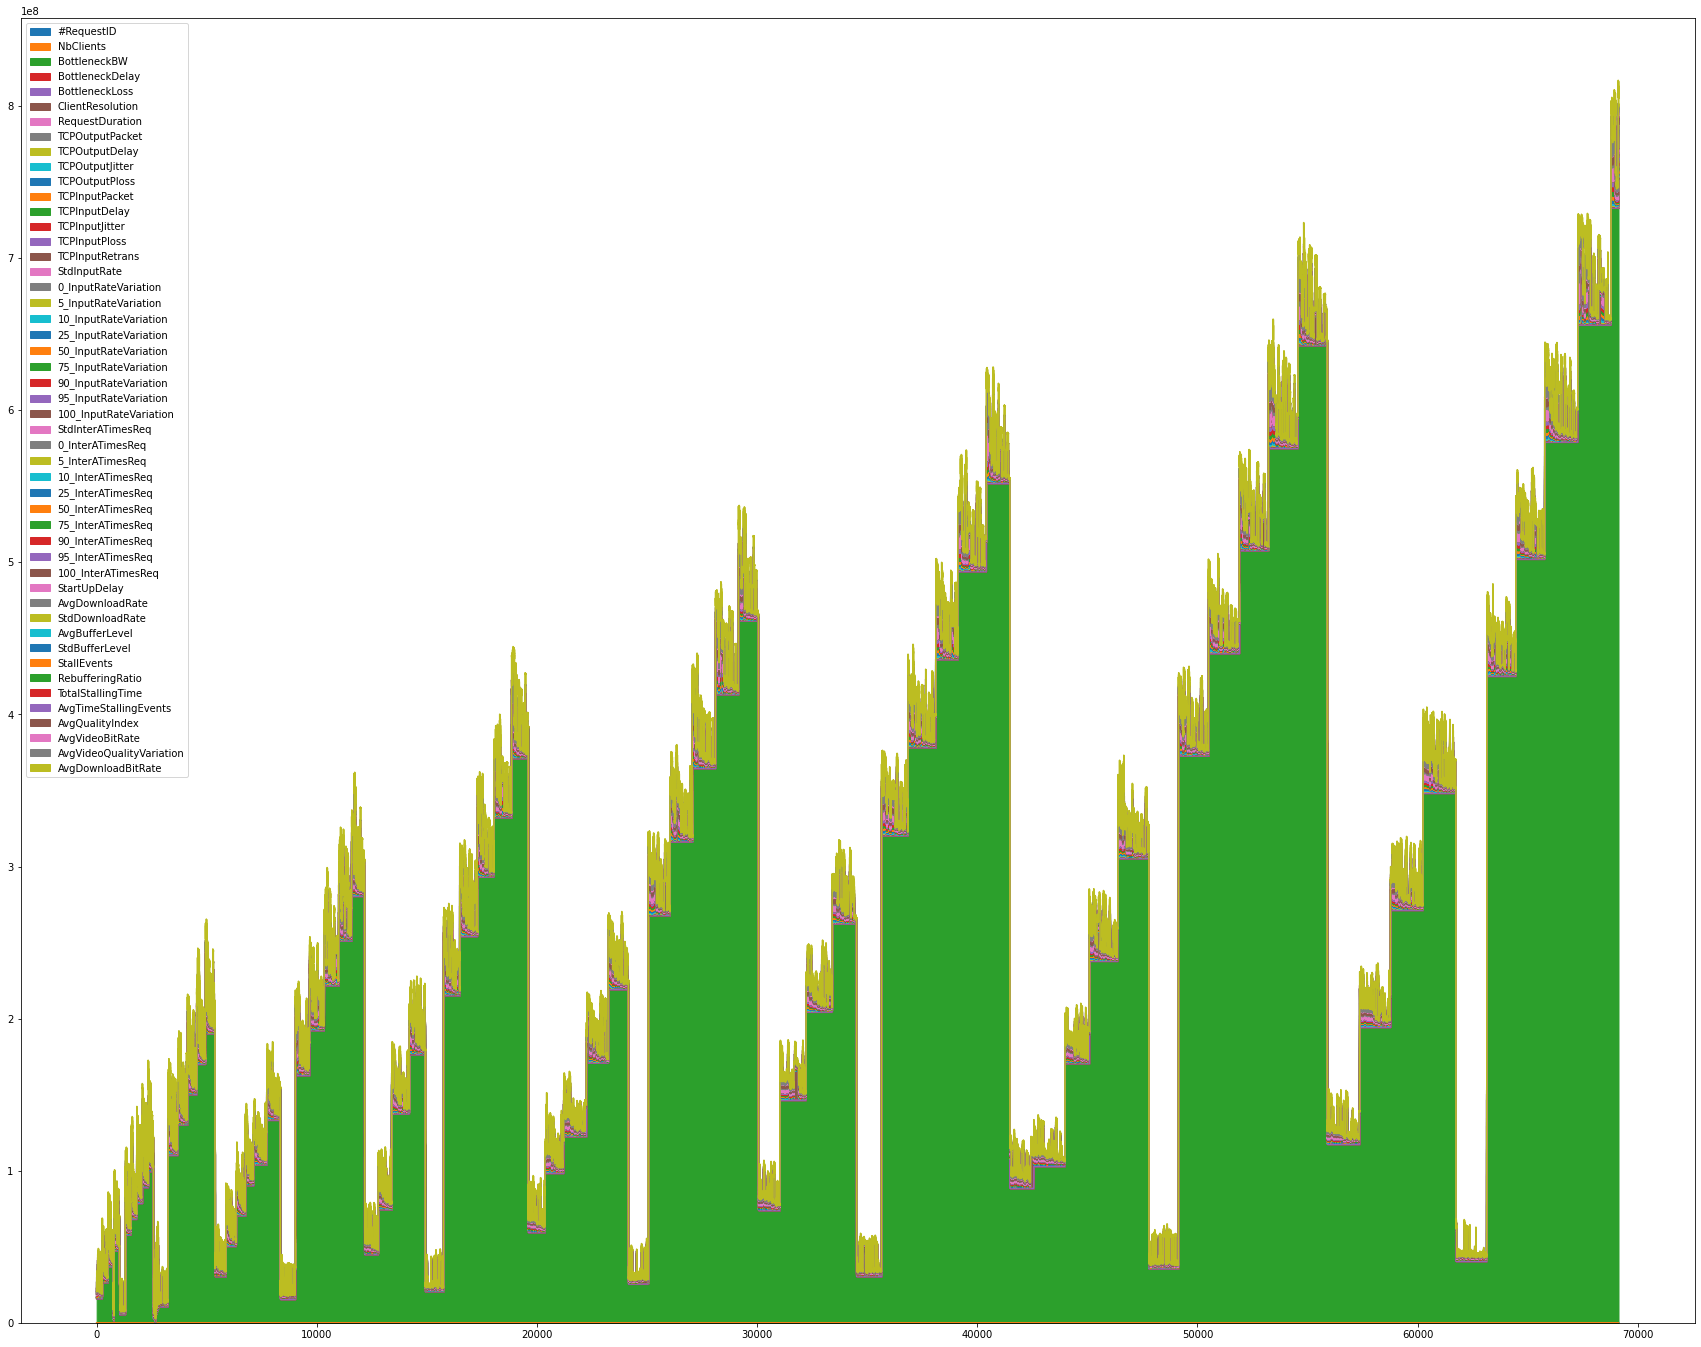

In [16]:
# Visualizing the distribution of the data. Result below shows that the data does not follow normal distribution.
df.plot.area(figsize=(30, 24))

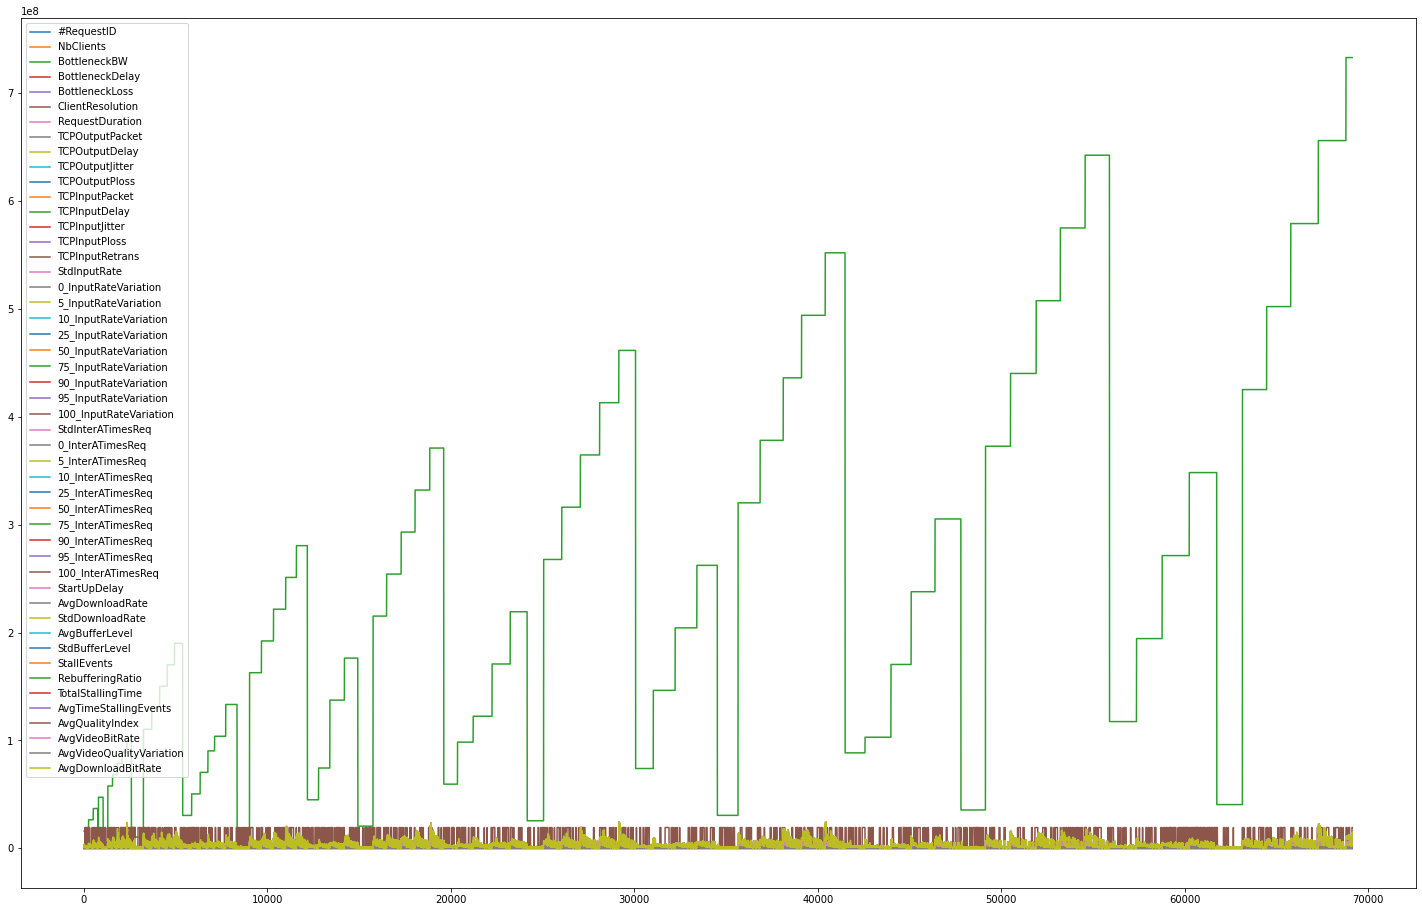

In [17]:
# Same as above and we can also see from below there some features are related to one another - multiple colinearrity.
df.plot.line(figsize=(25, 16))


In [18]:
#X represent feautures which is qos. There are 36 of them. The code below extracts them
X = df.iloc[:, 1:37]


In [19]:
qoe = [ 'StartUpDelay', 'AvgDownloadRate', 'StdDownloadRate', 'AvgBufferLevel', 'StdBufferLevel', 'StallEvents', 'RebufferingRatio', 'TotalStallingTime', 'AvgTimeStallingEvents', 'AvgQualityIndex', 'AvgVideoBitRate', 'AvgVideoQualityVariation', 'AvgDownloadBitRate']

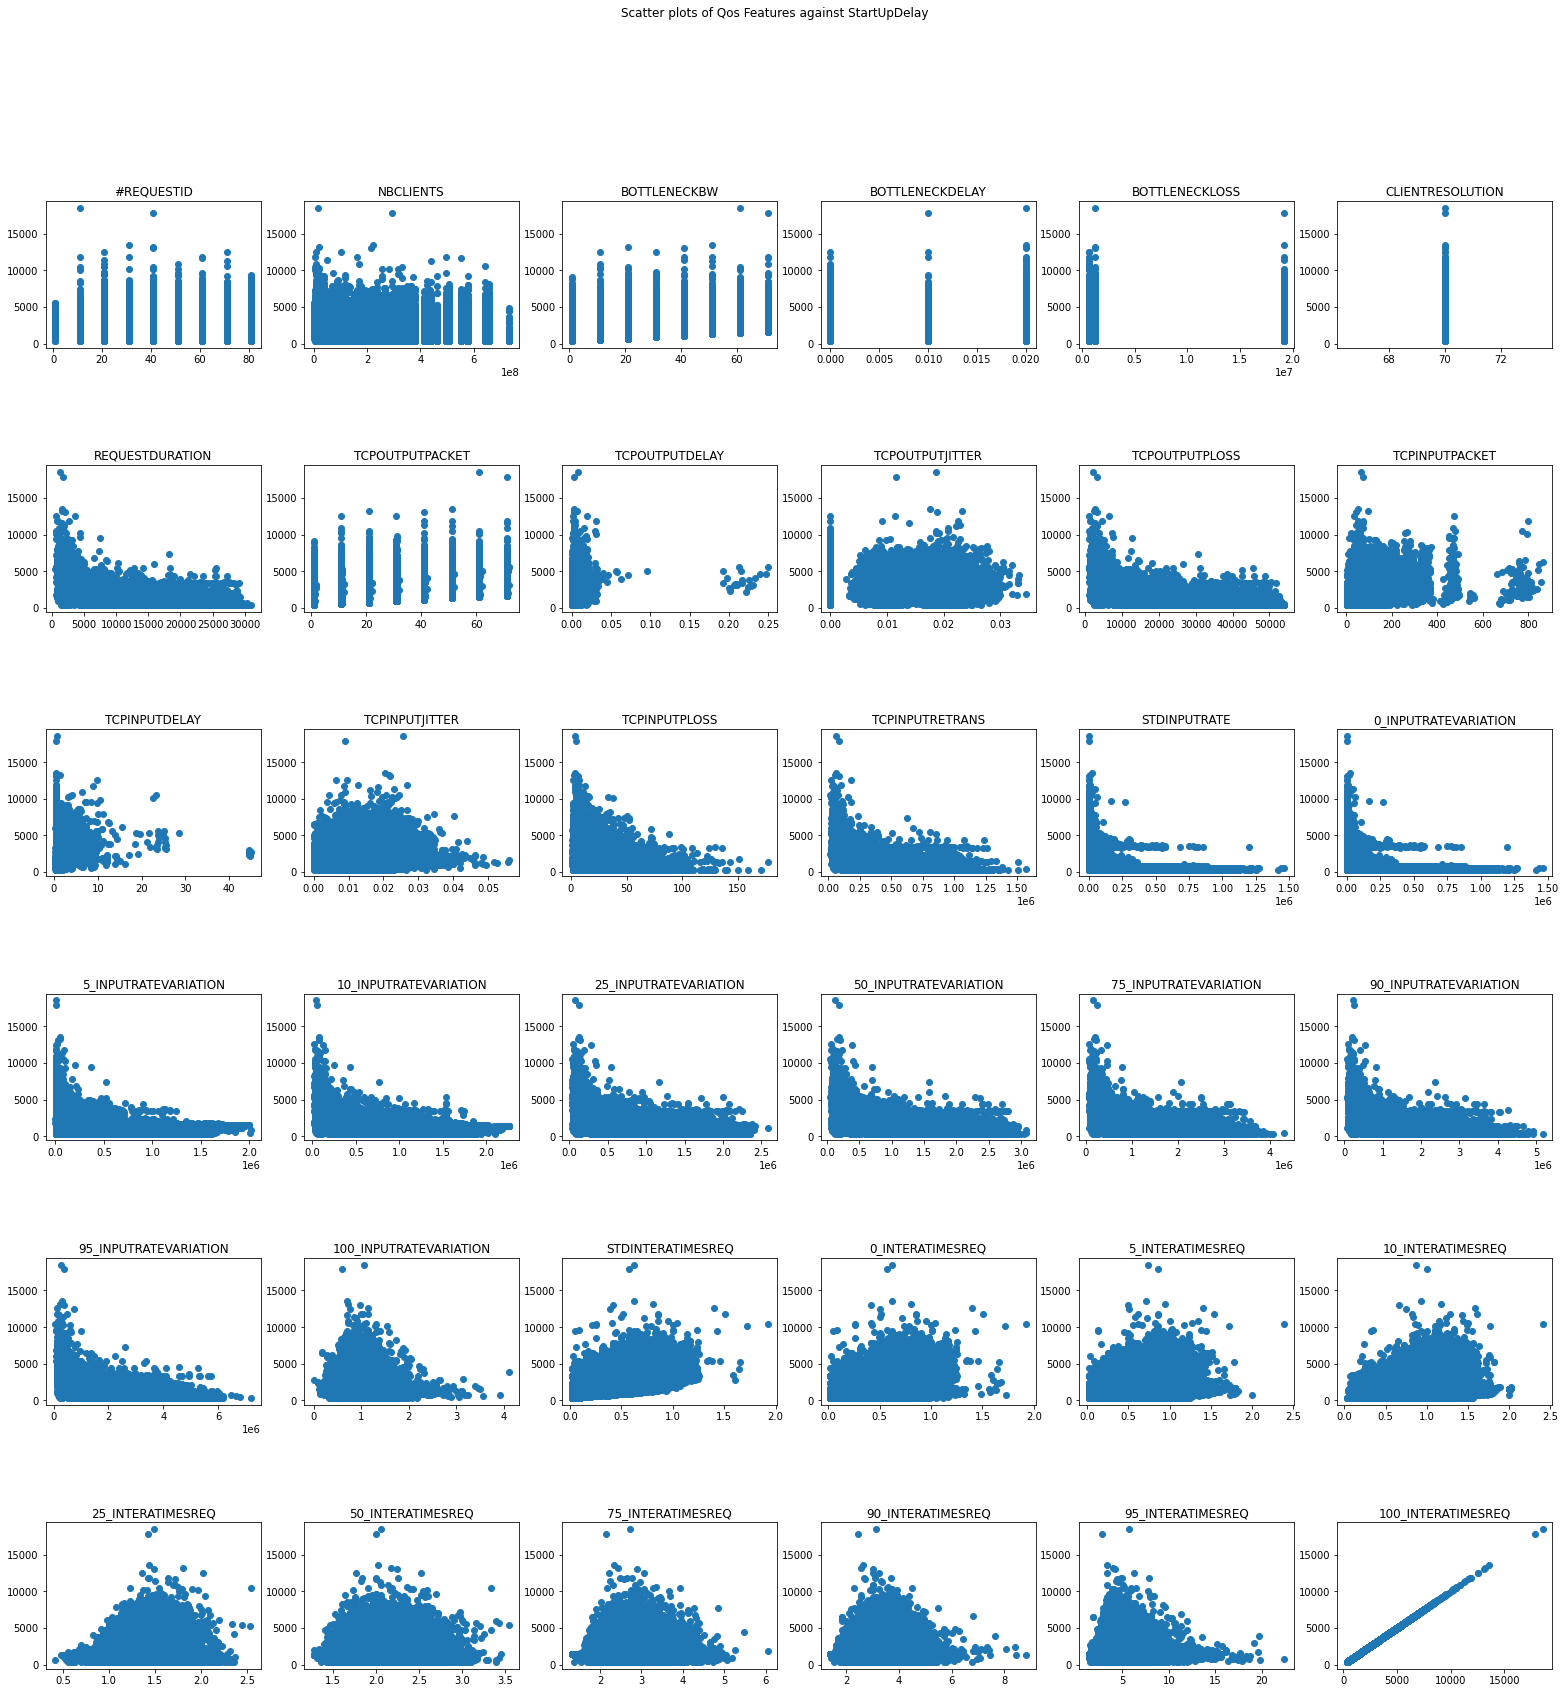

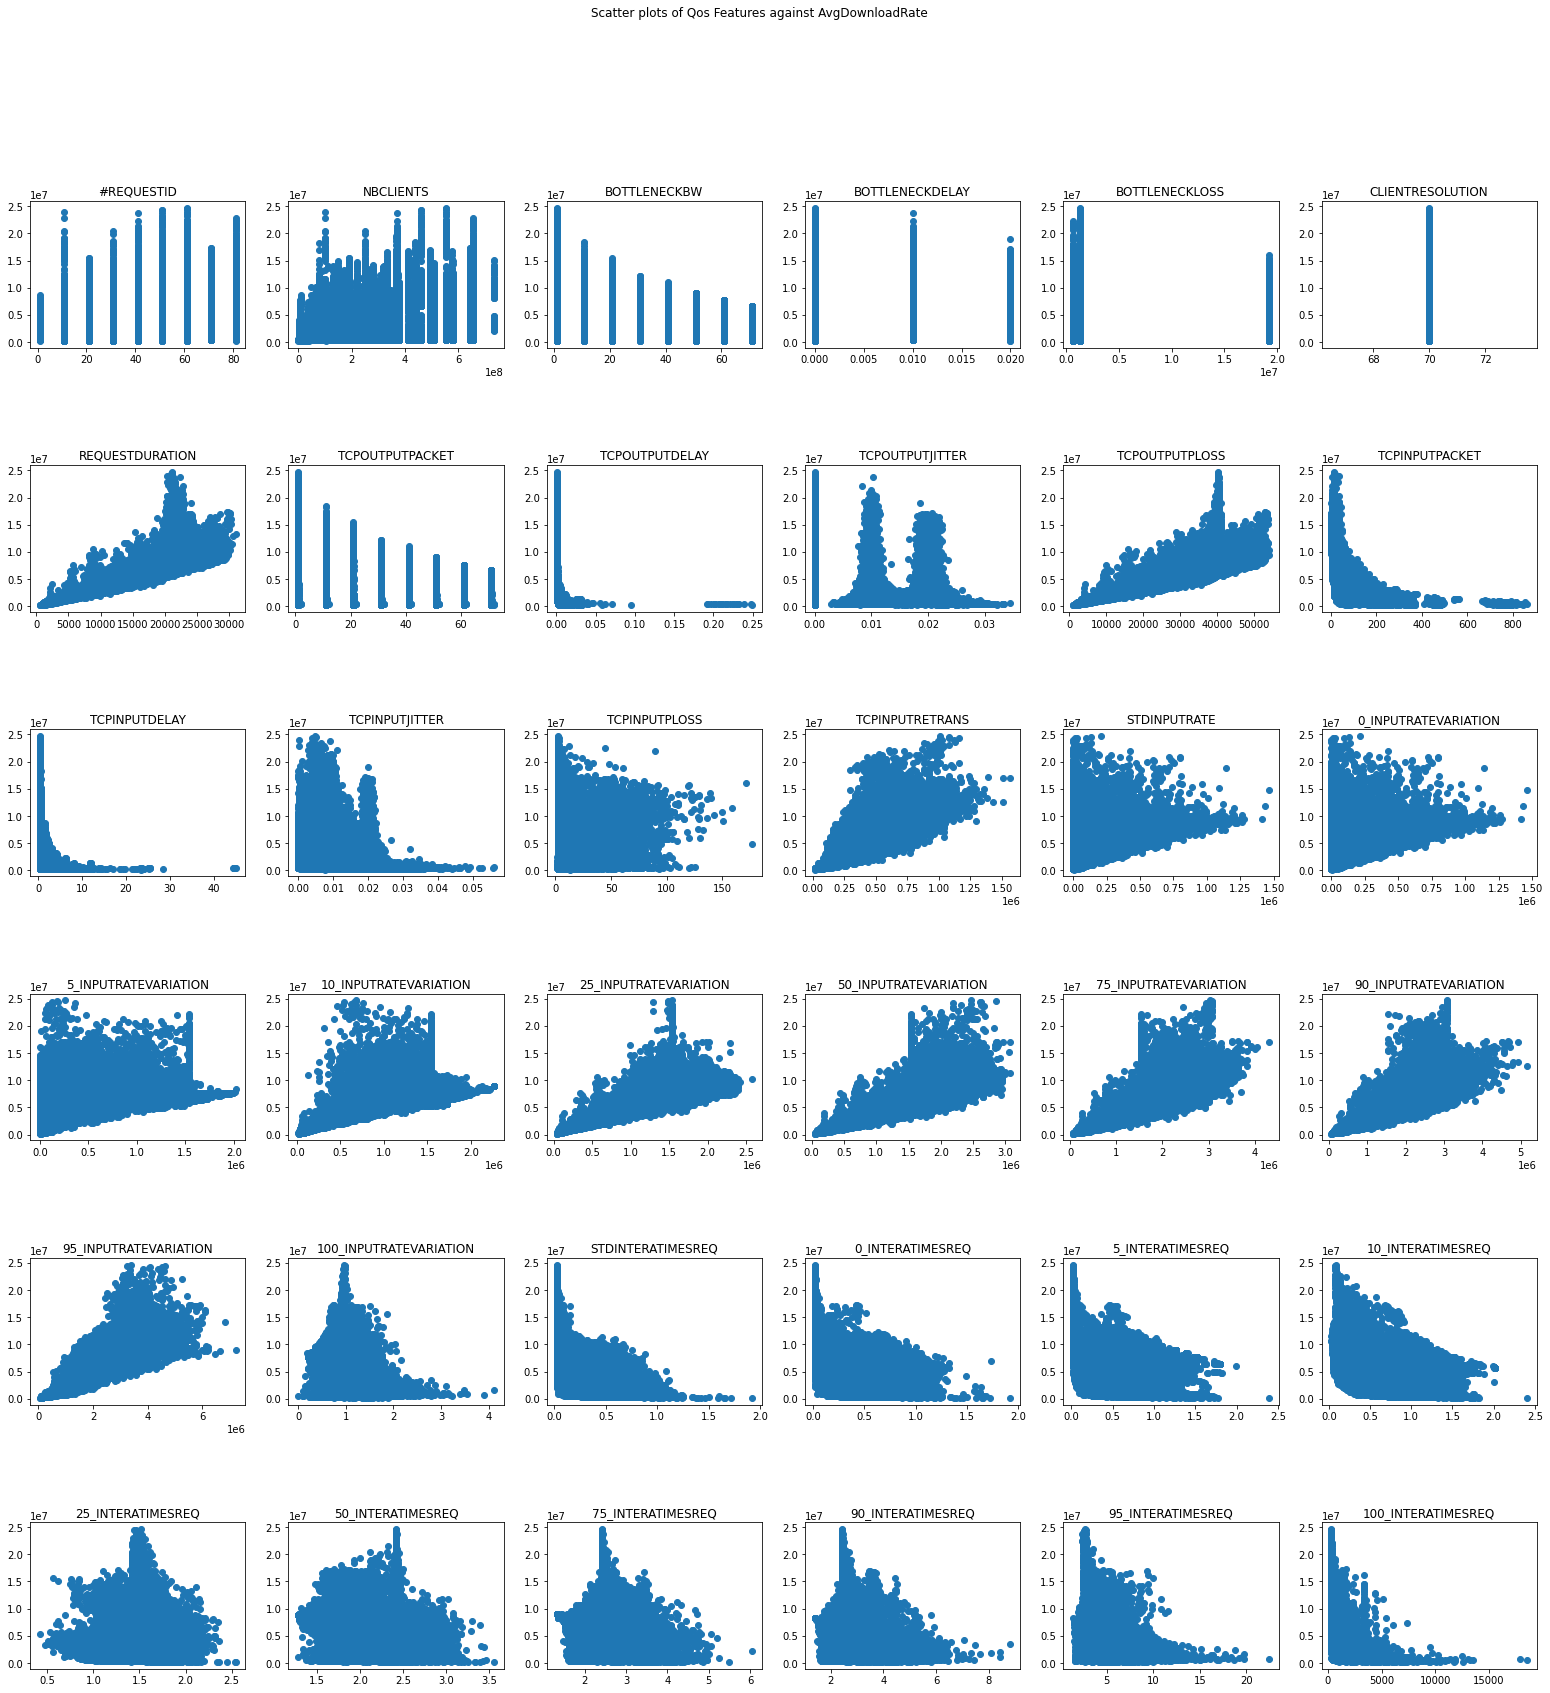

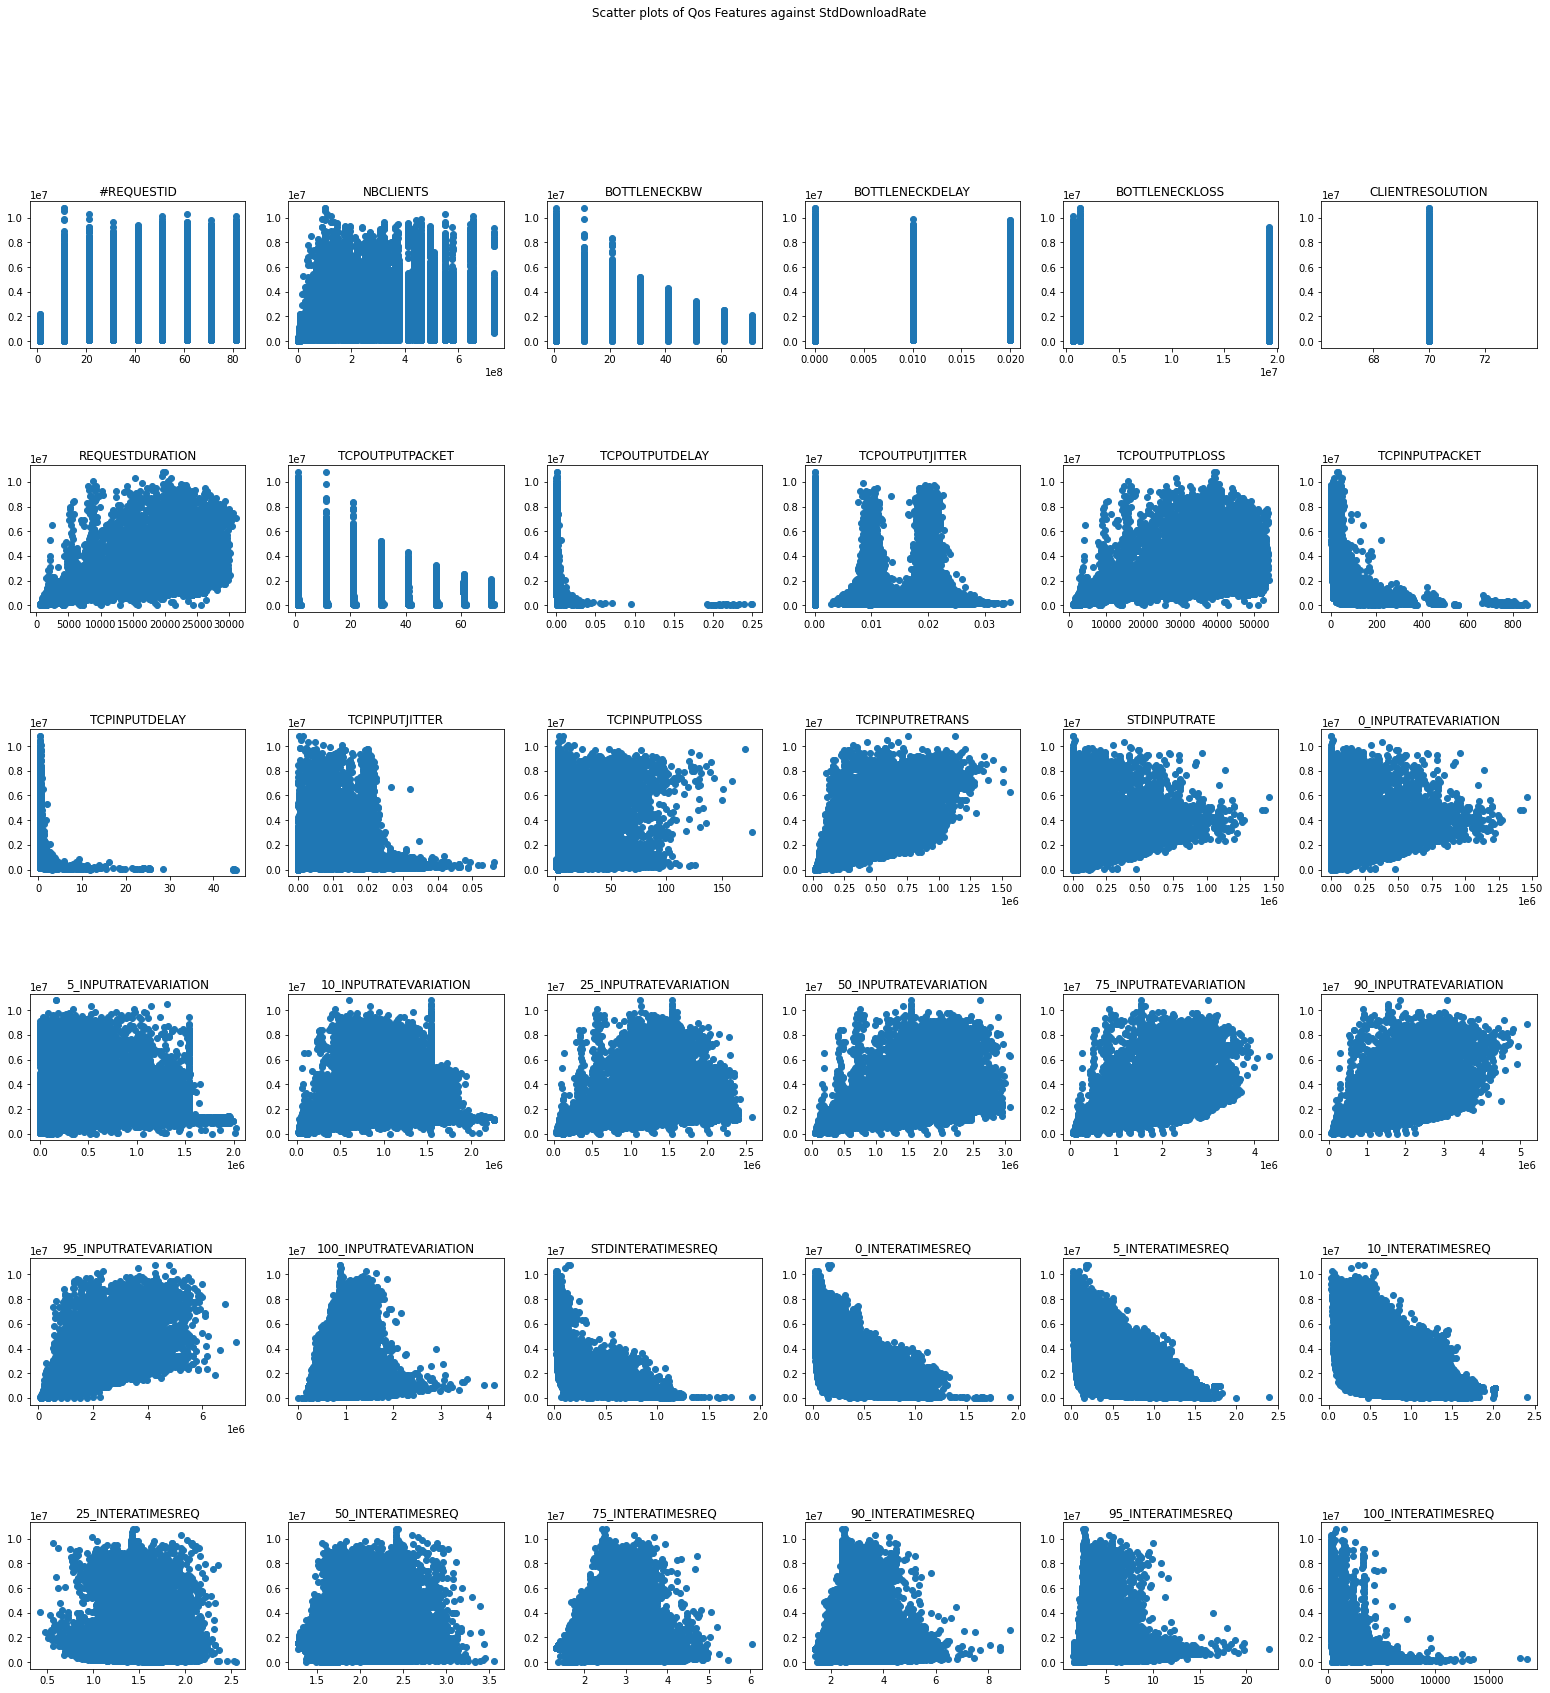

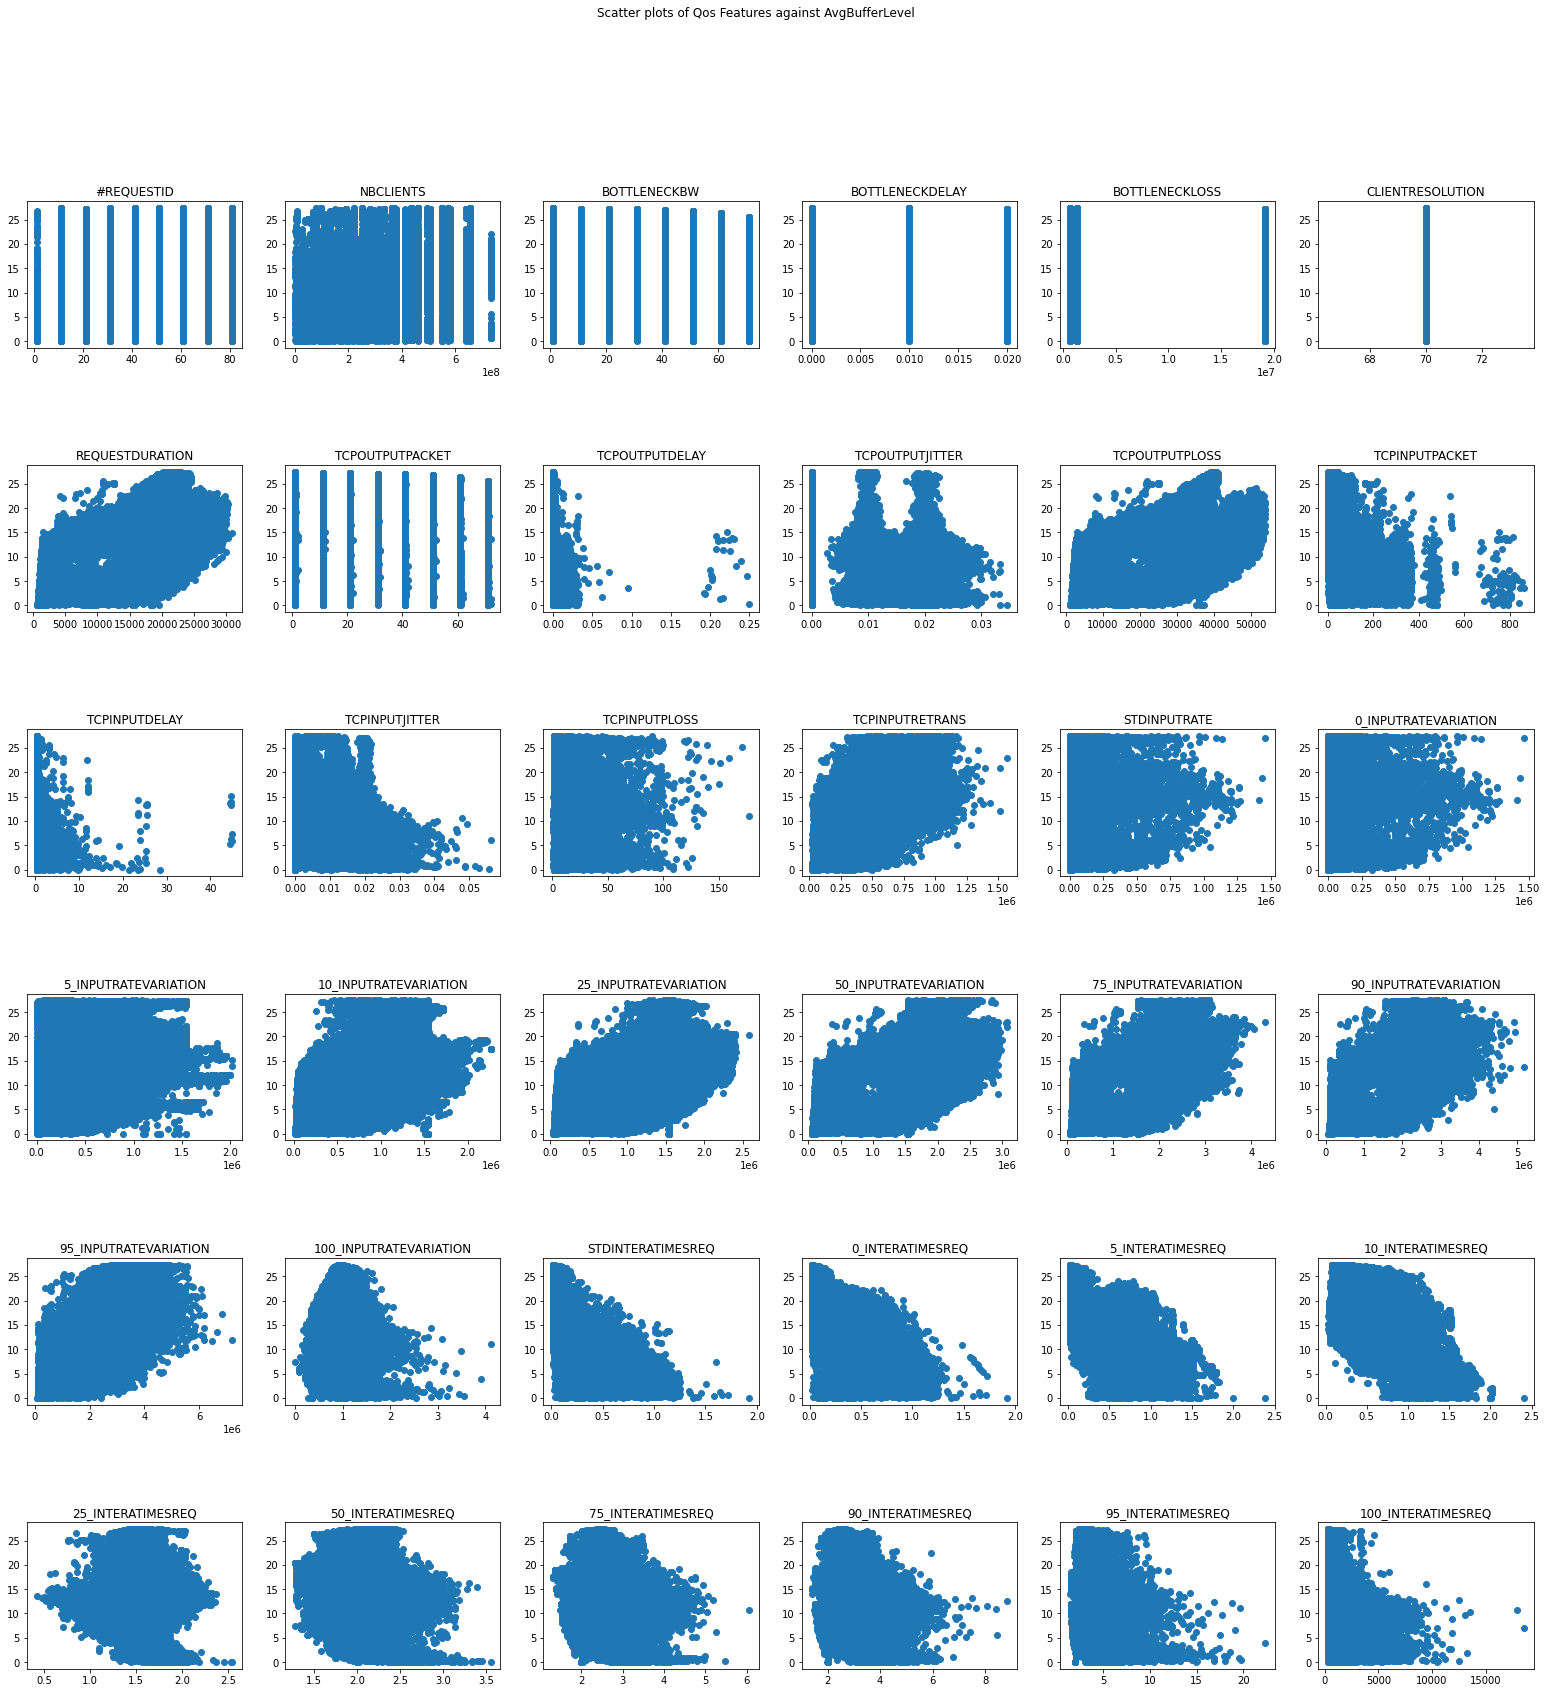

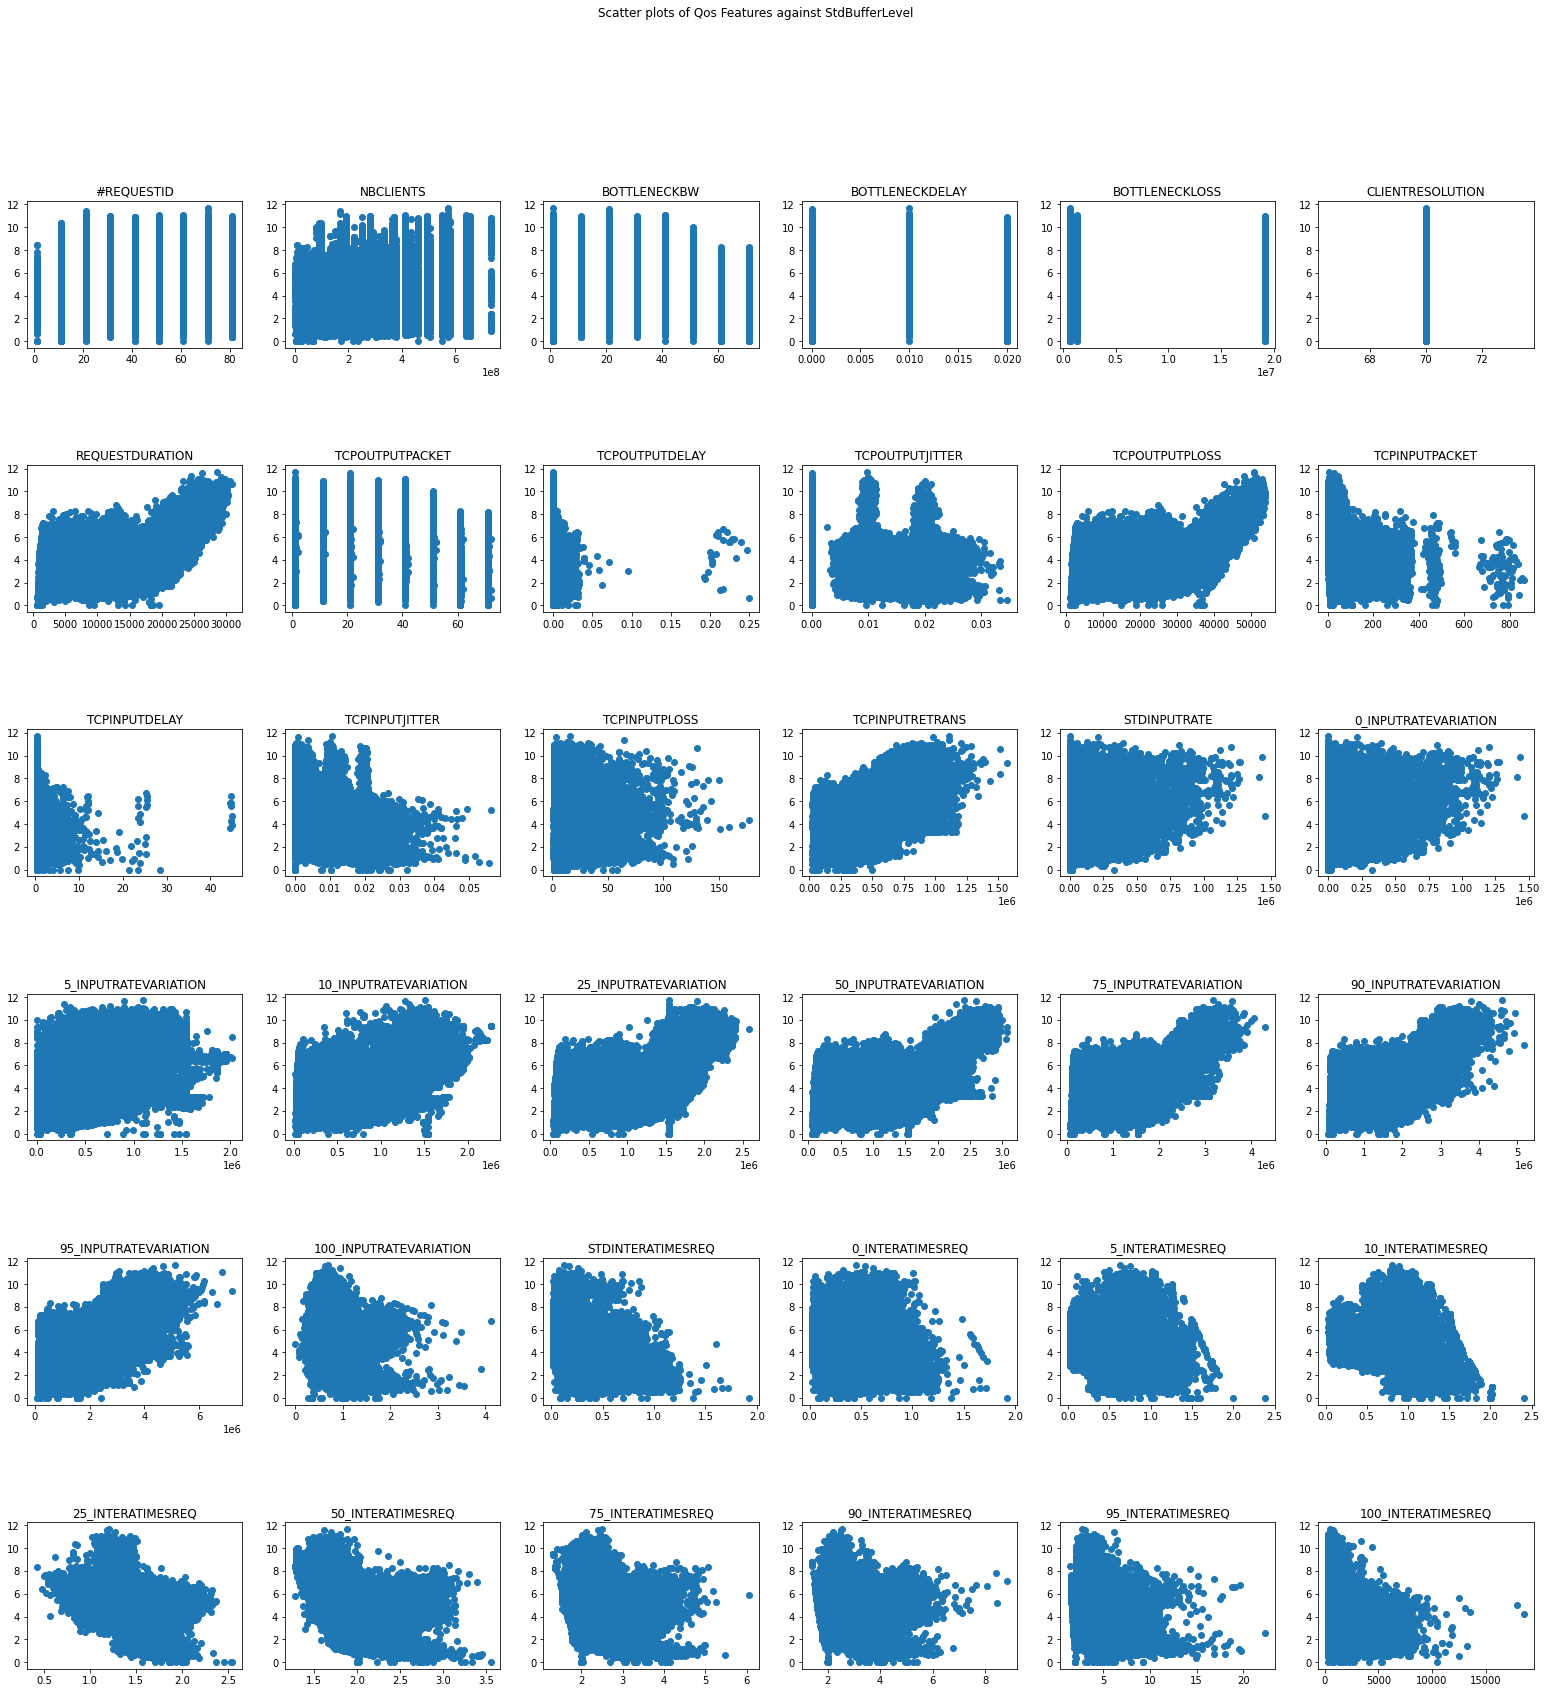

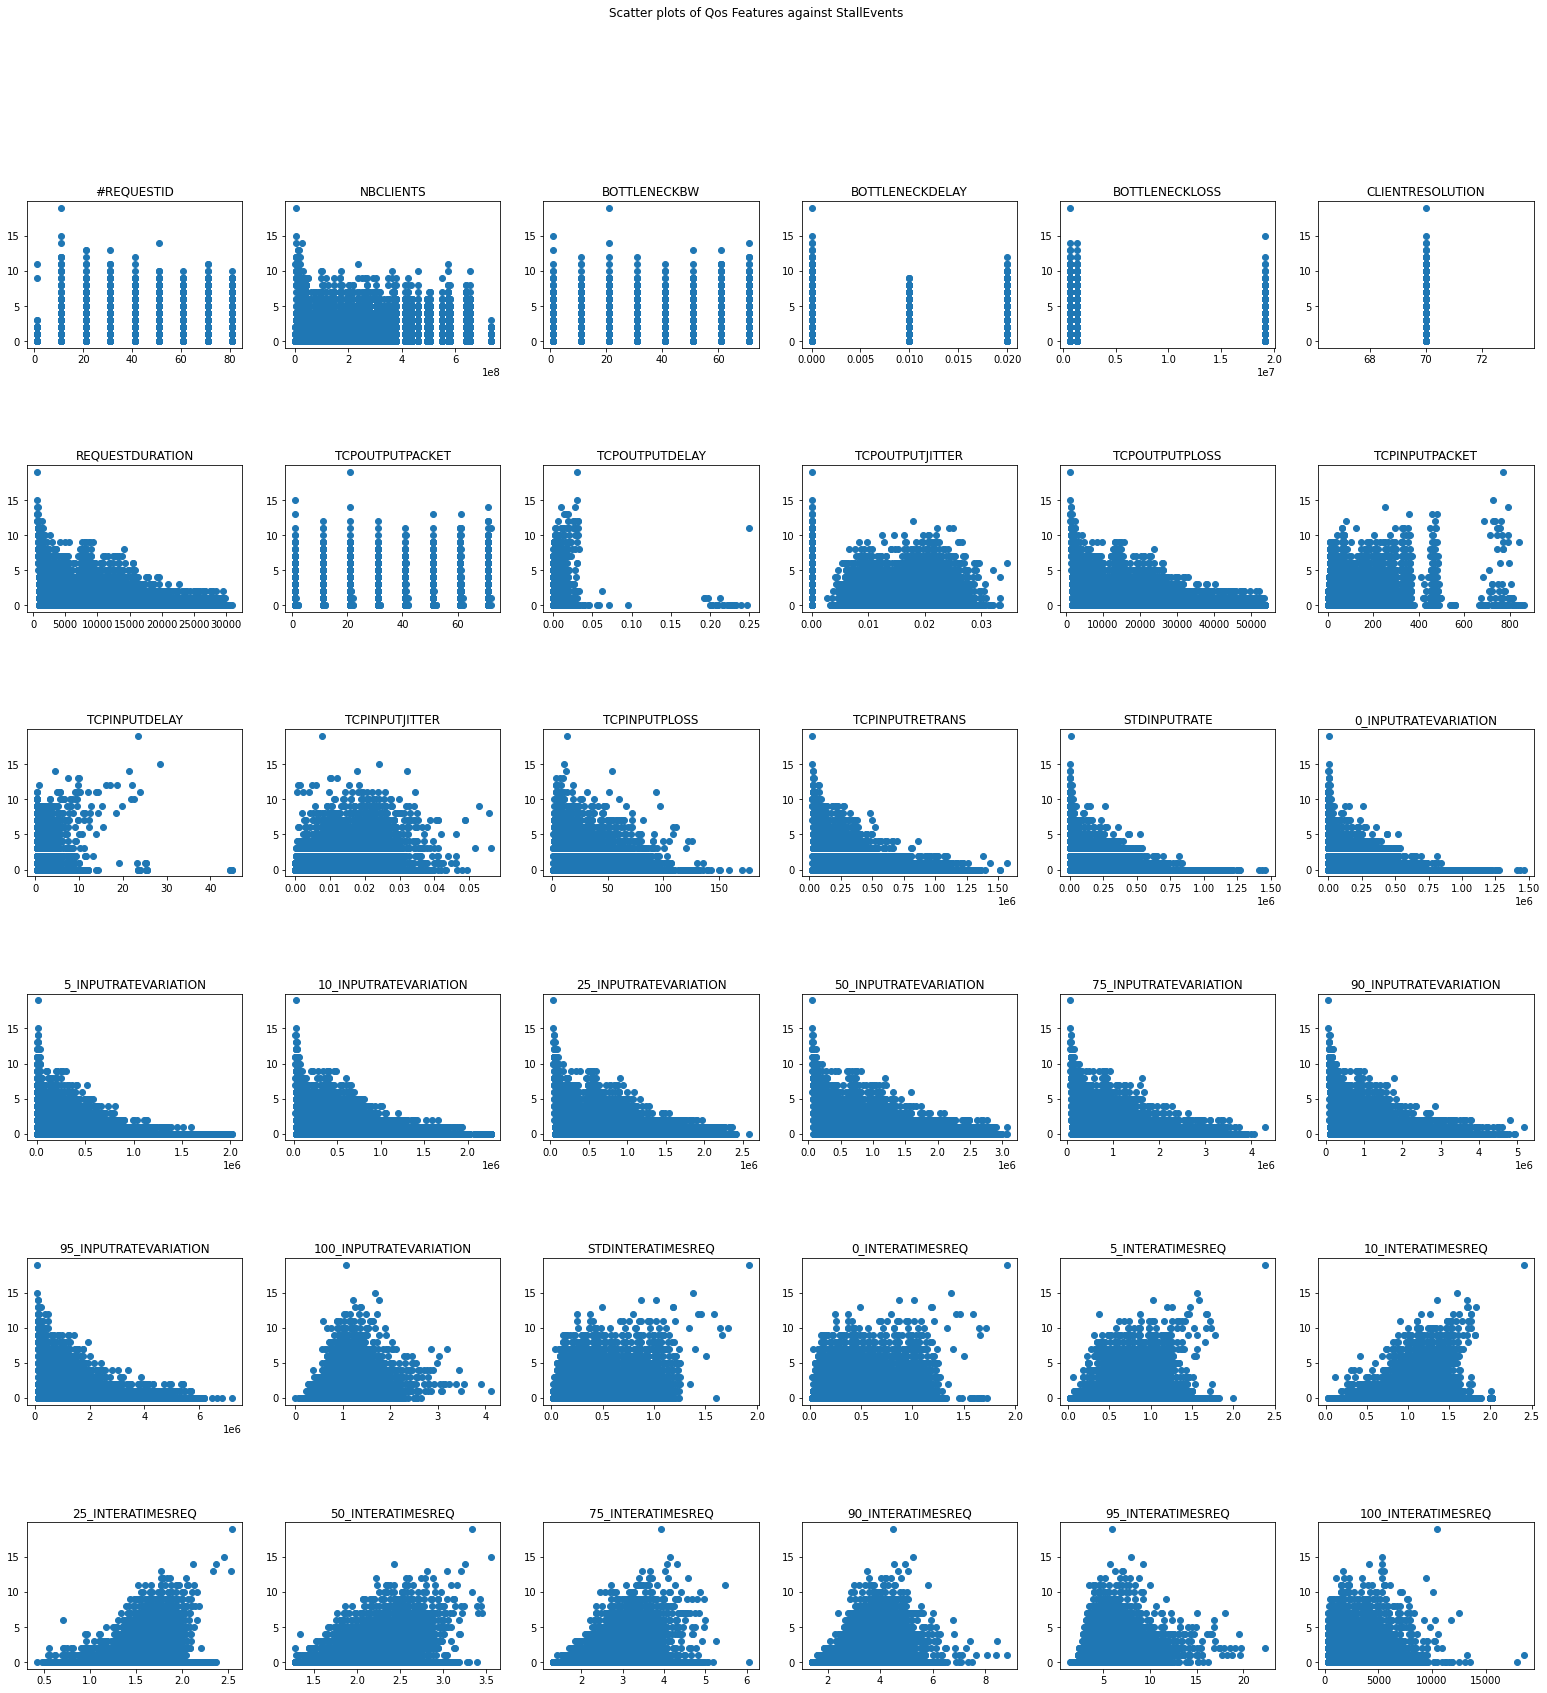

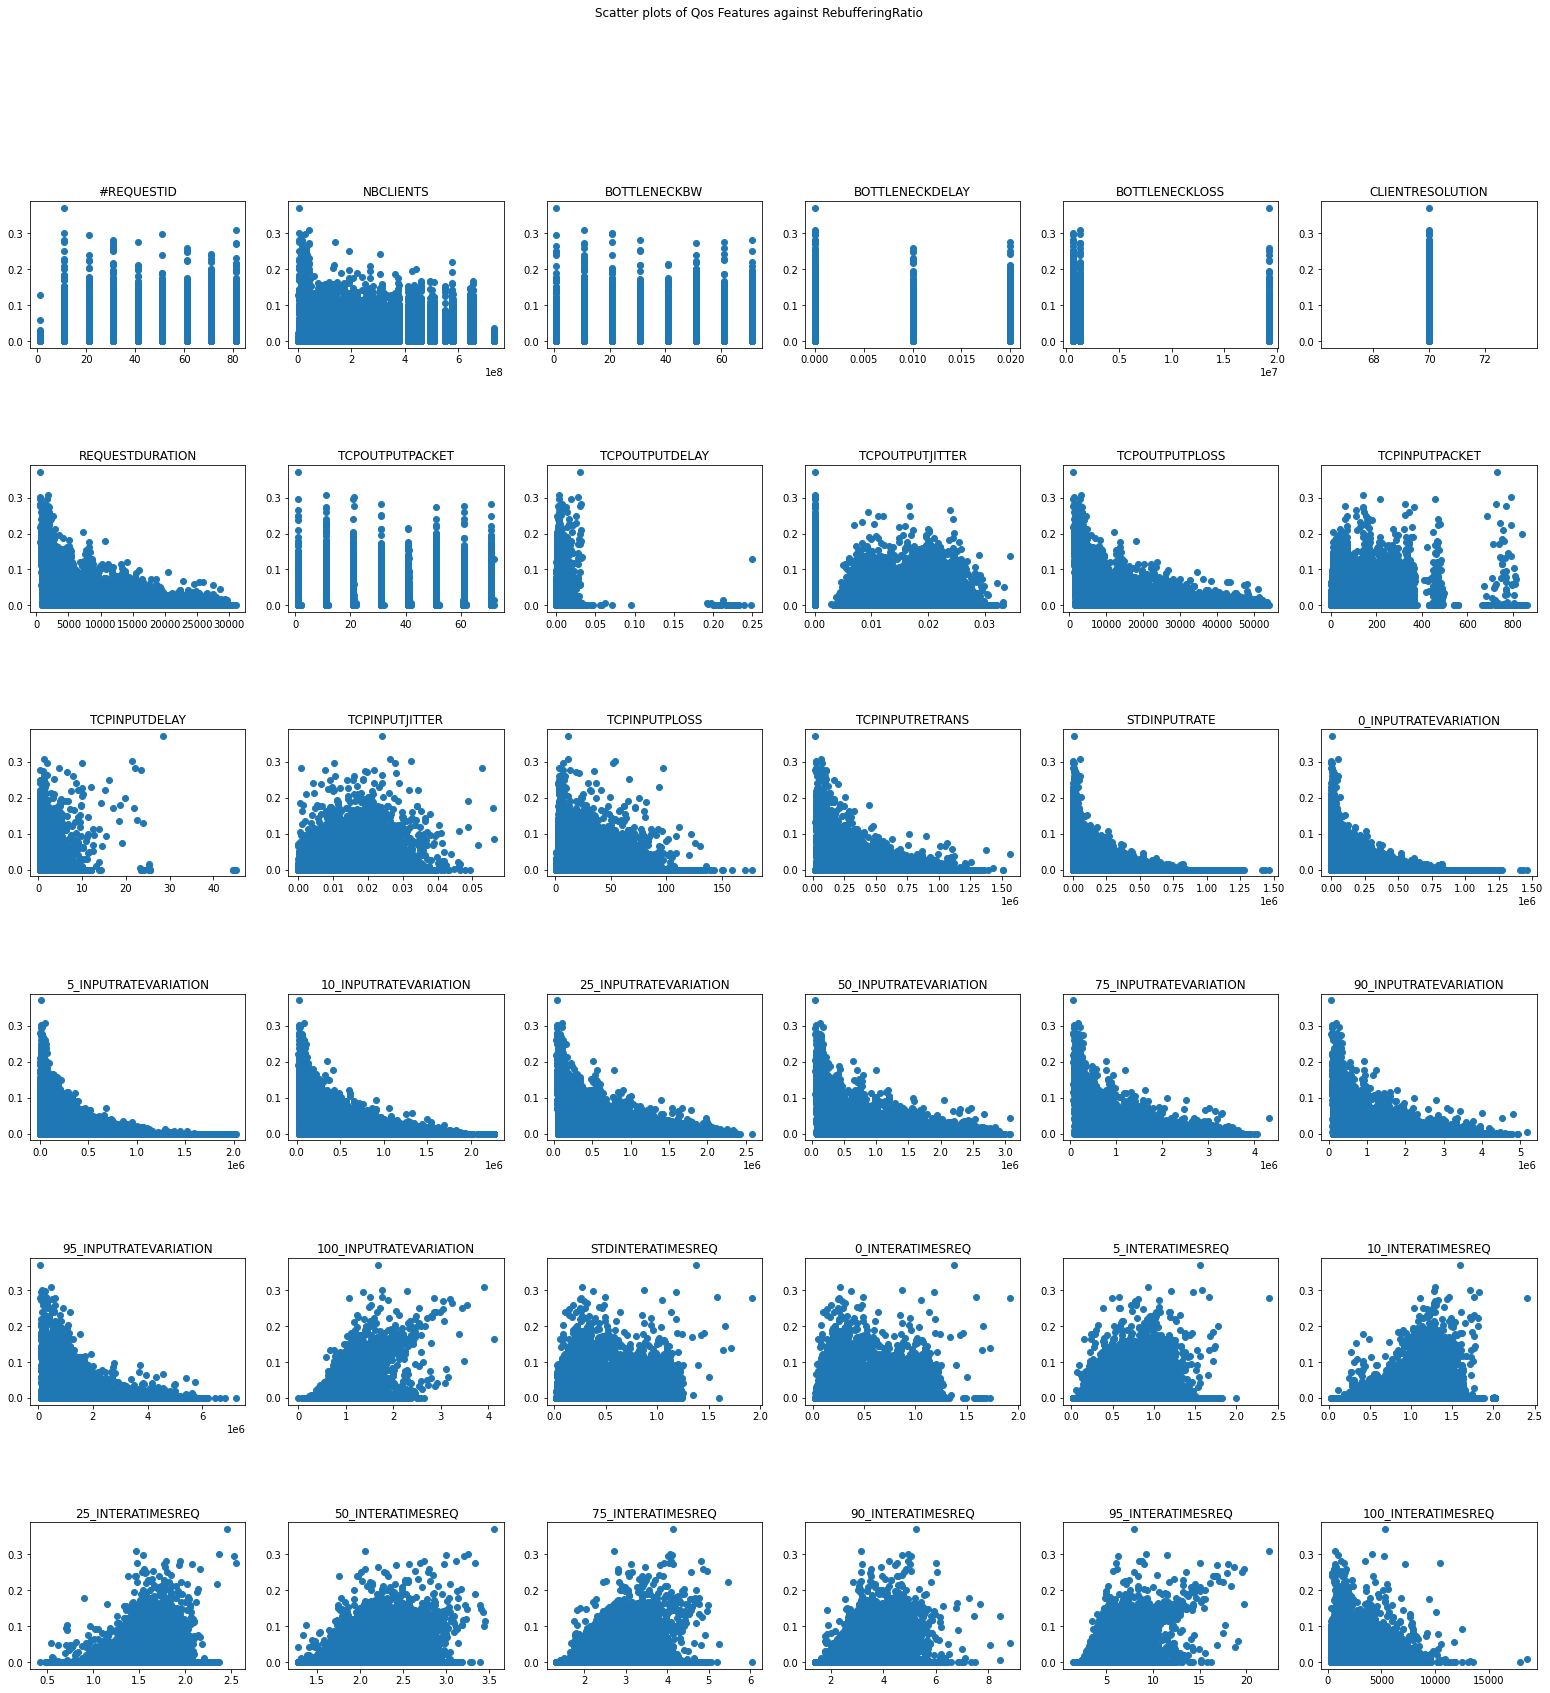

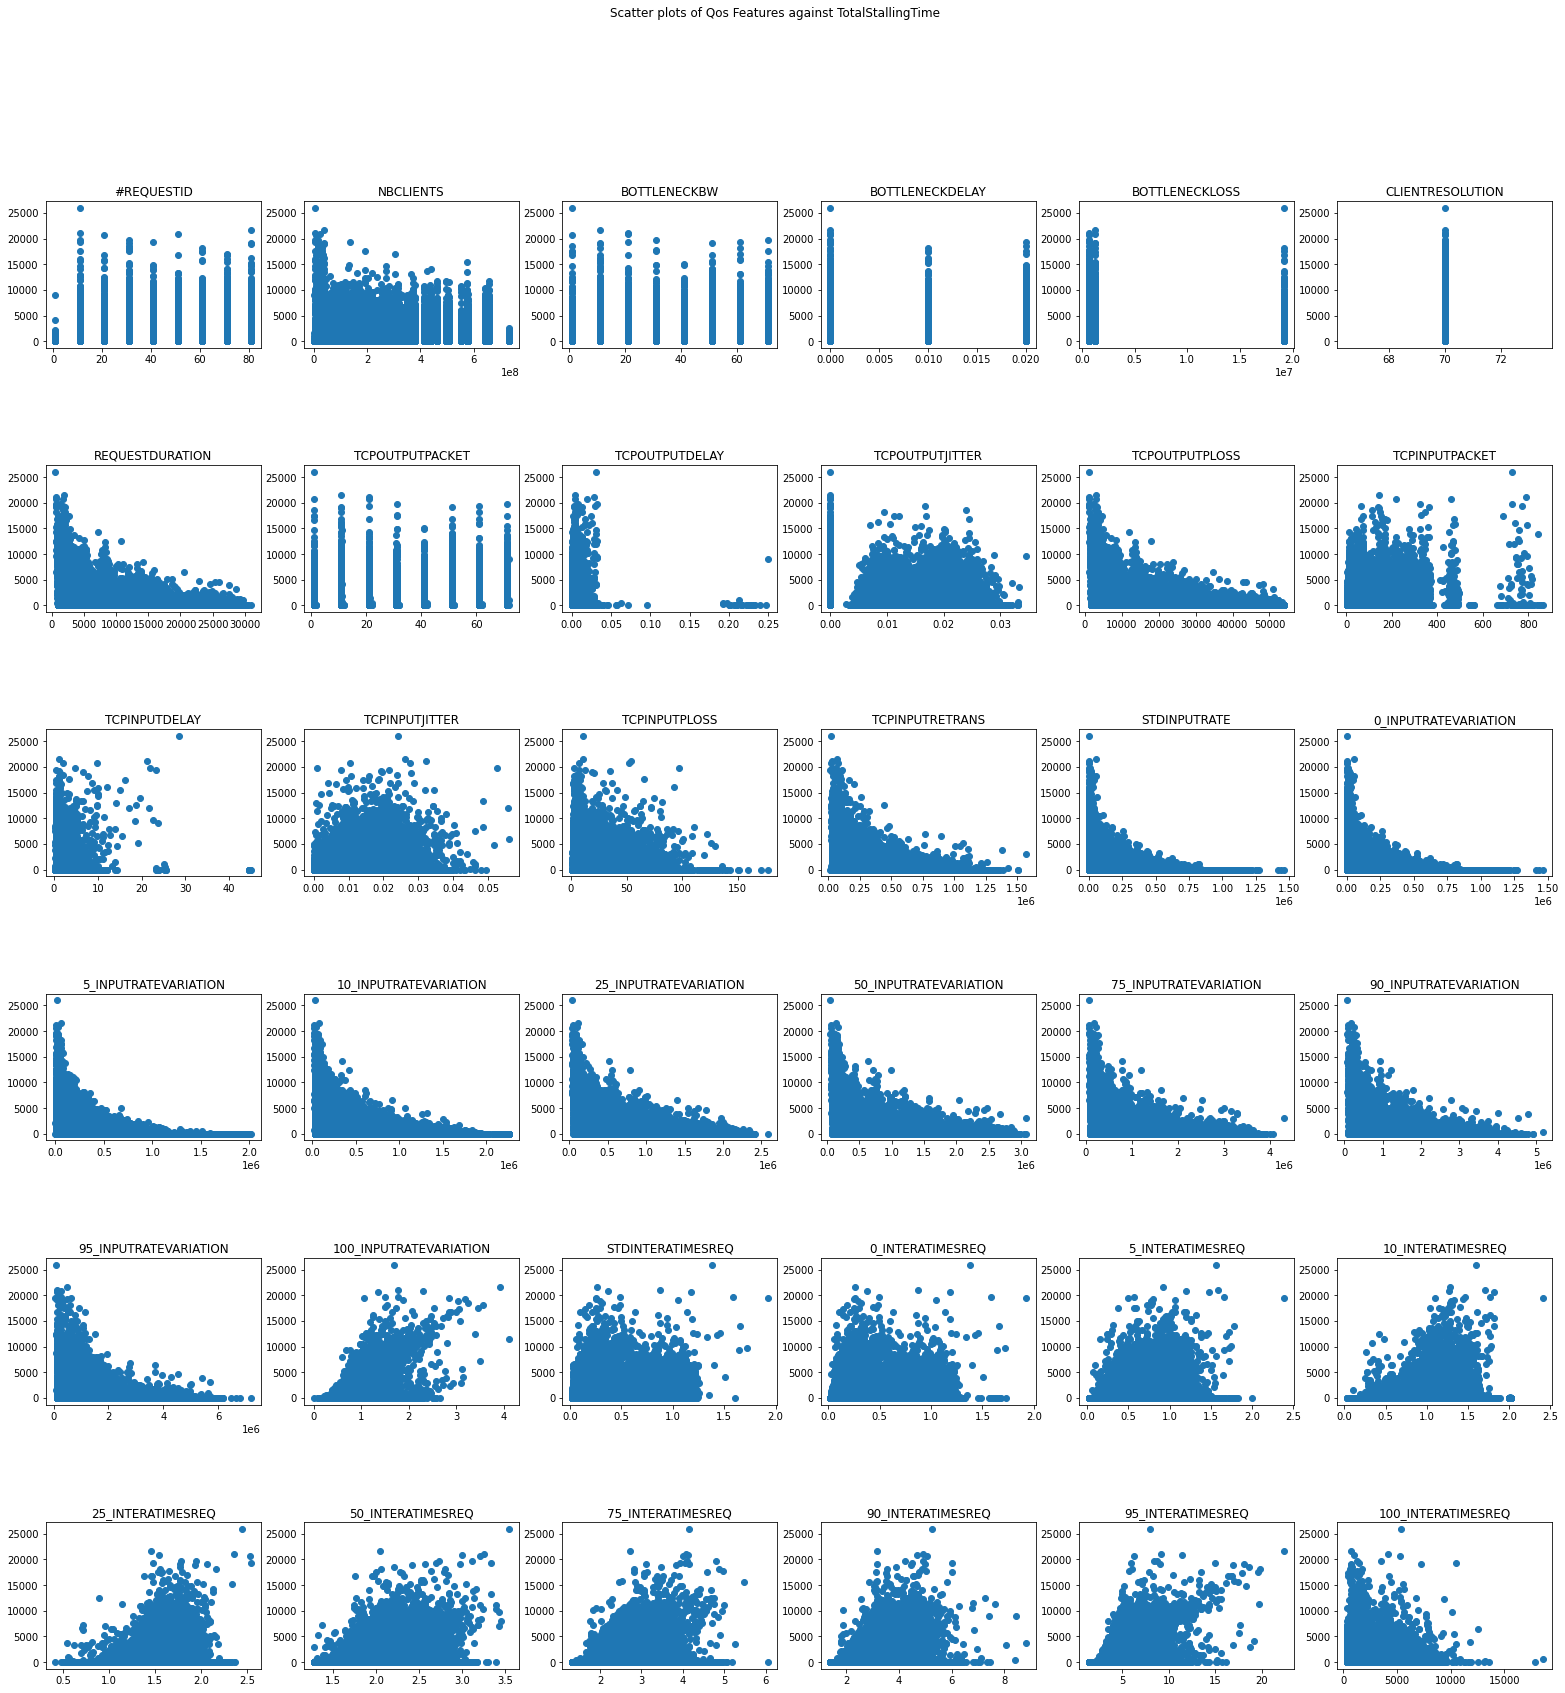

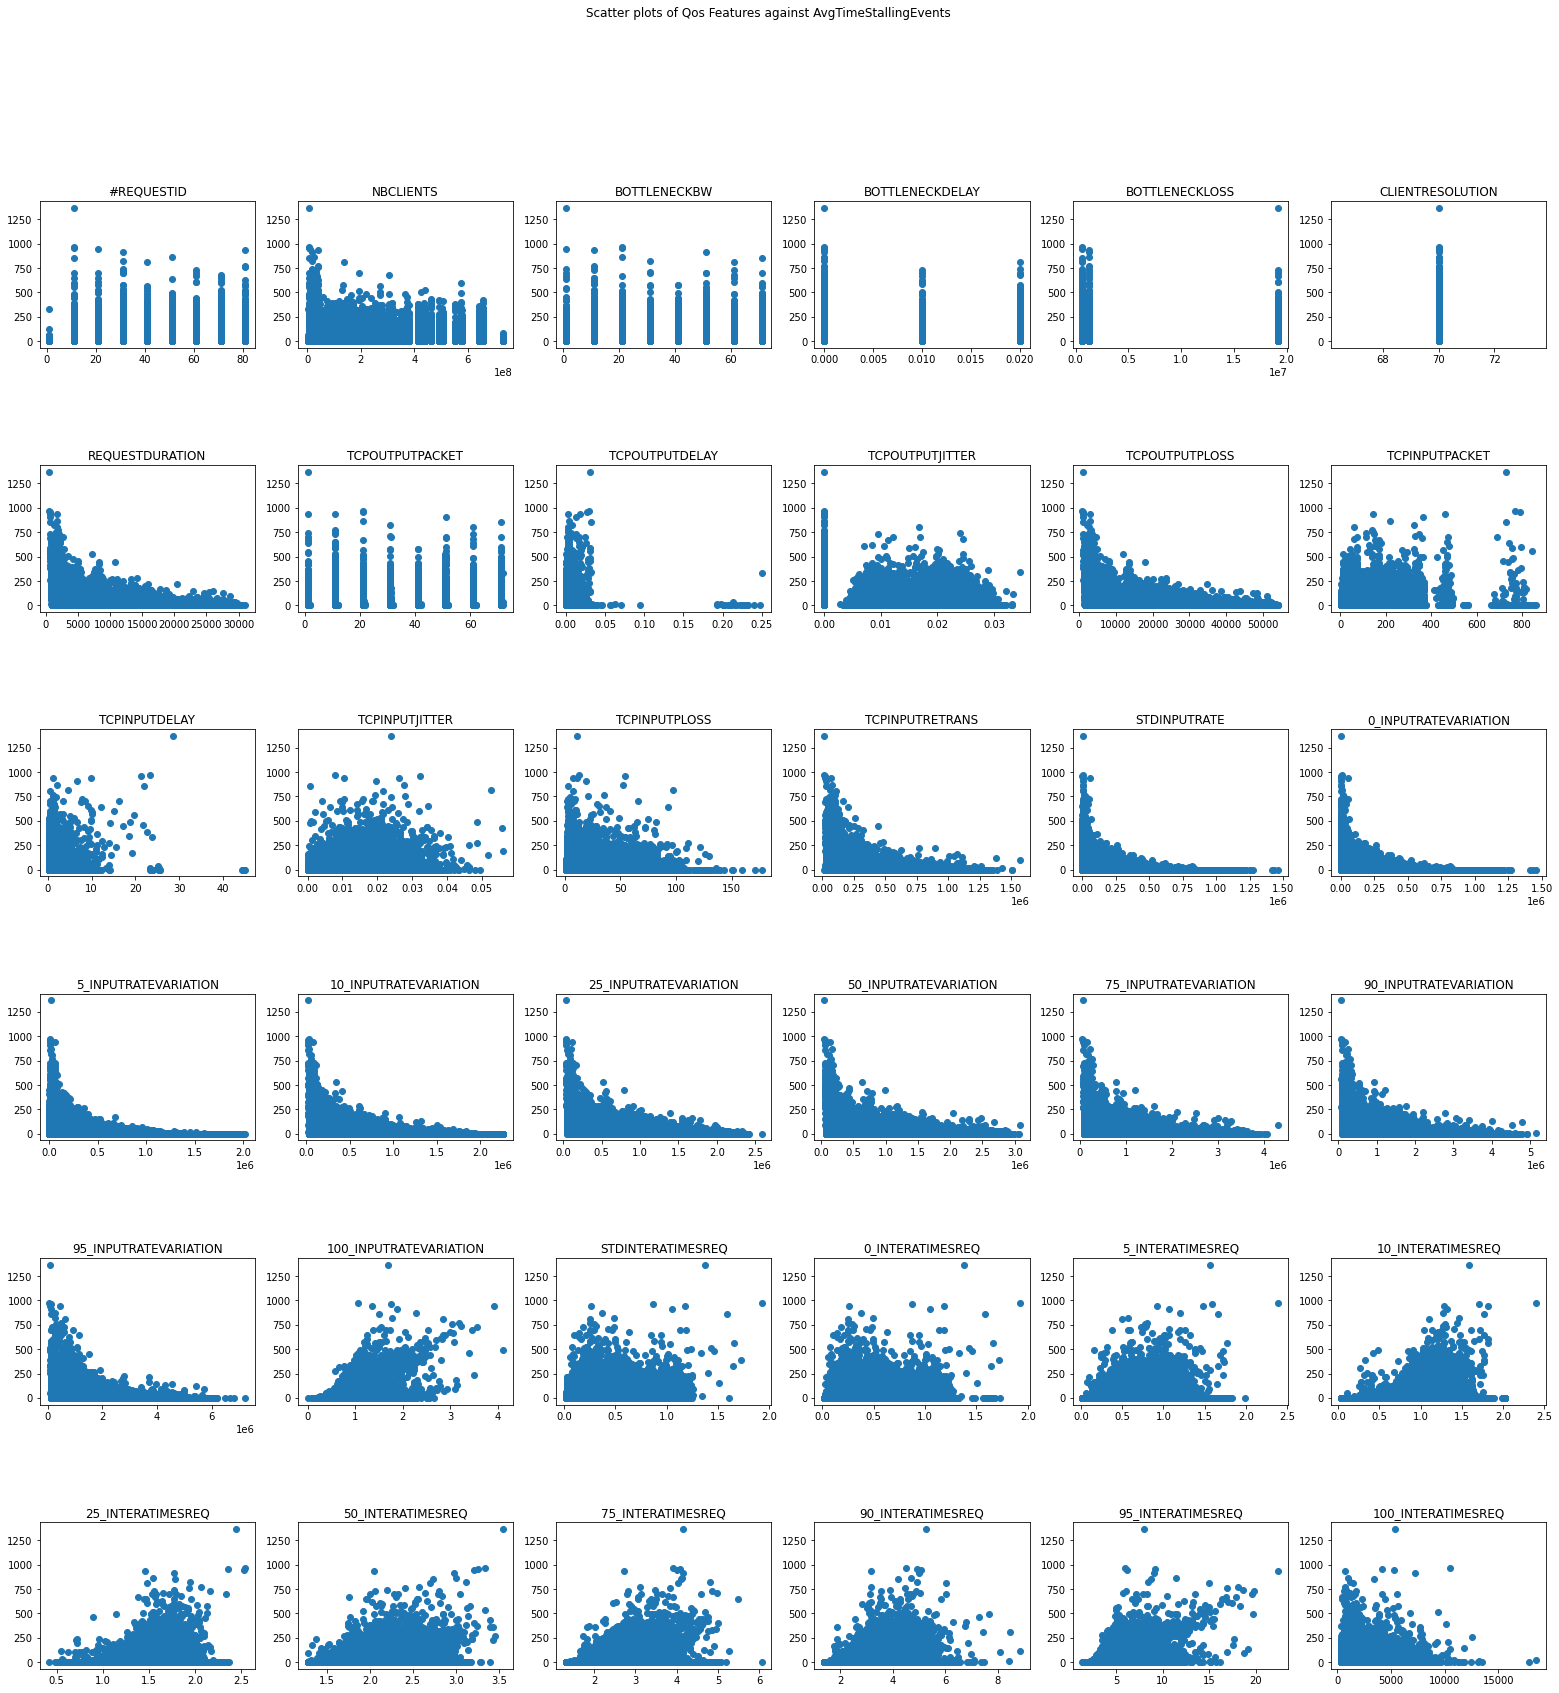

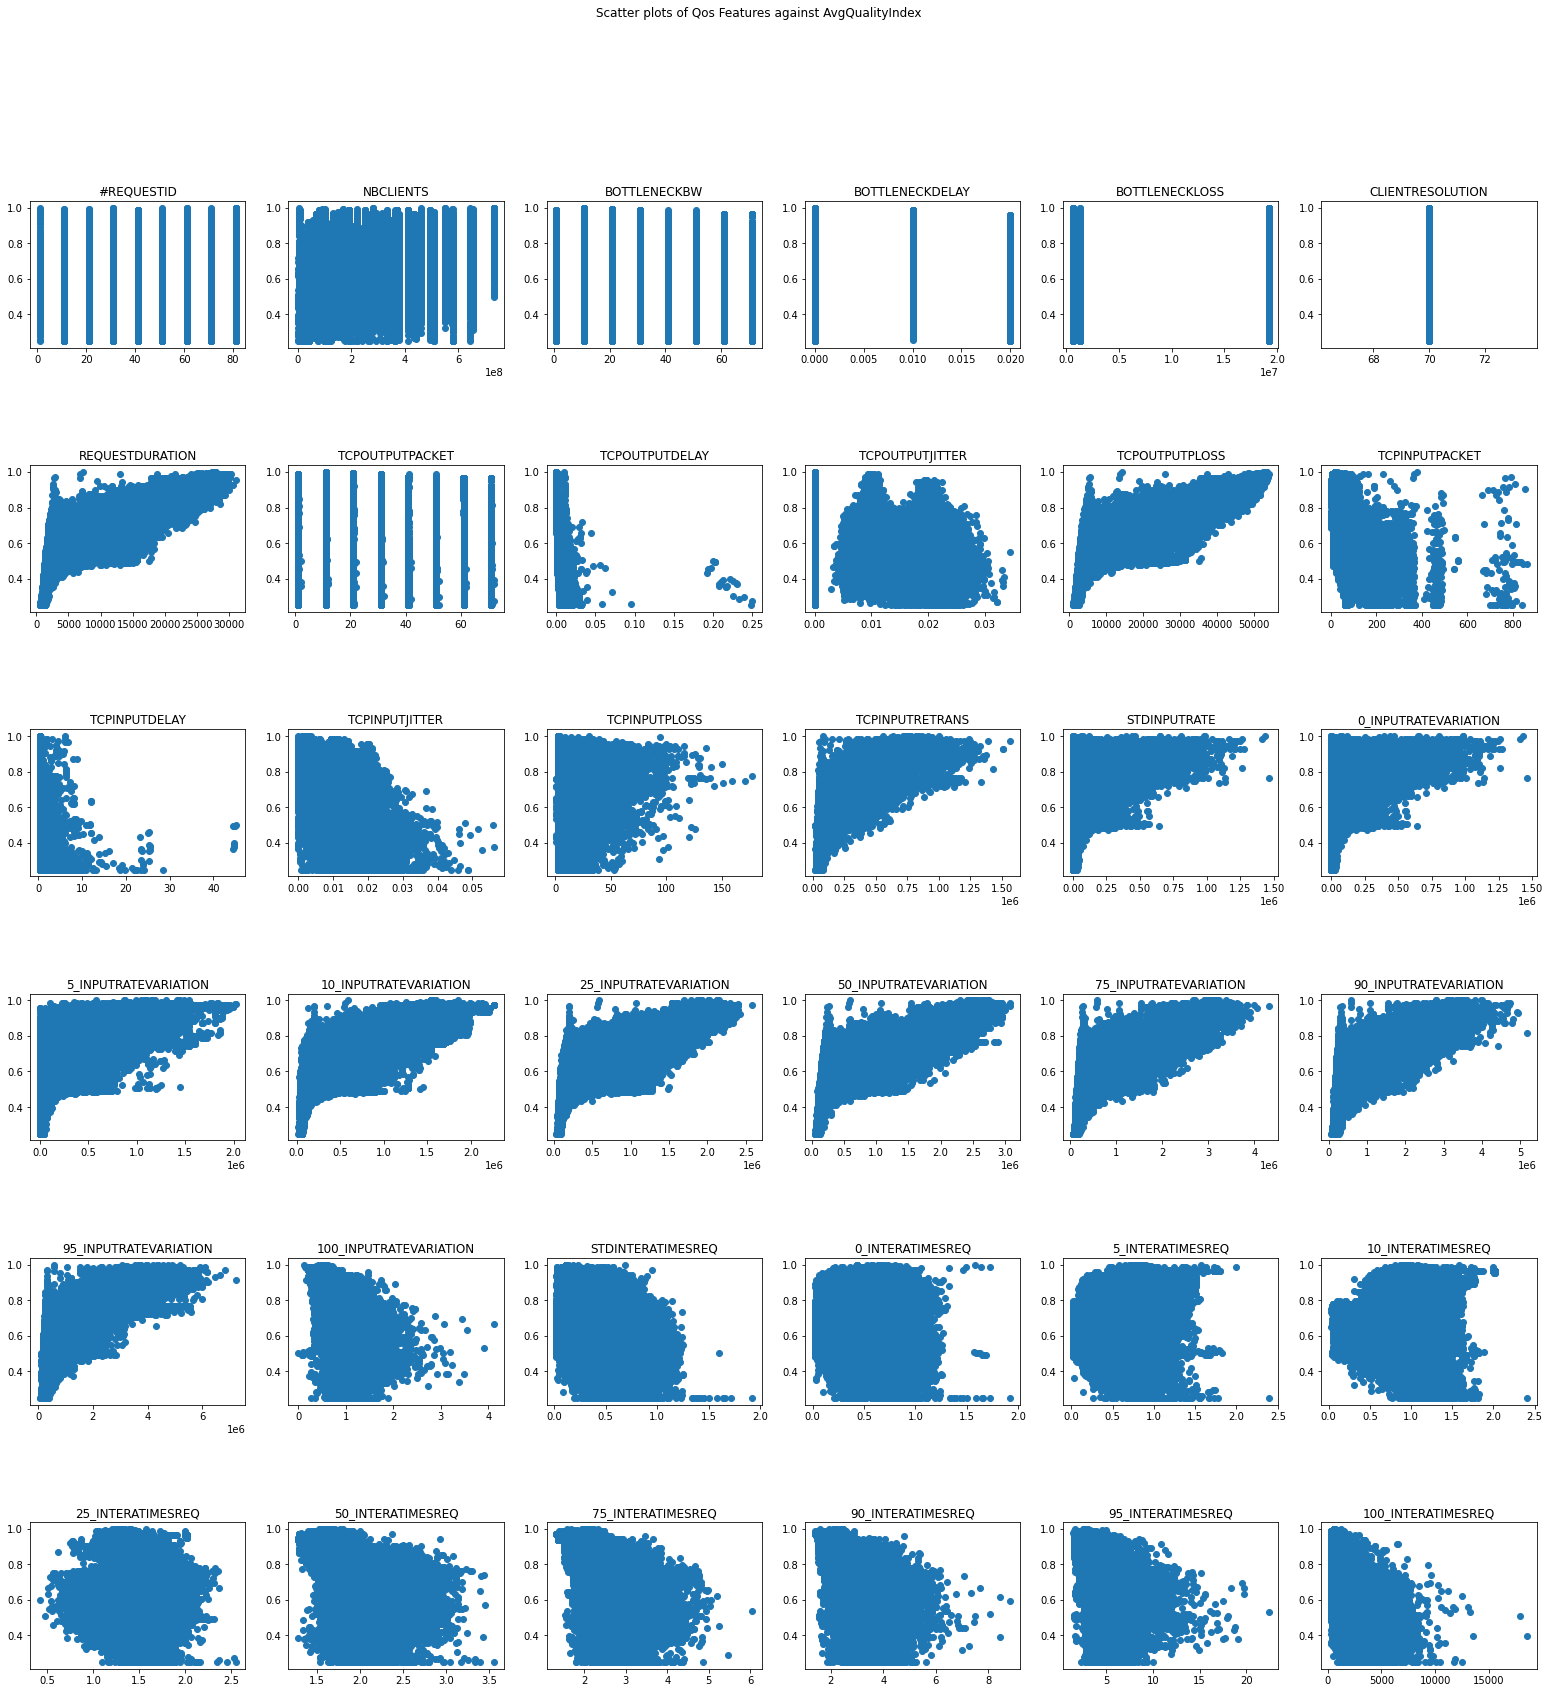

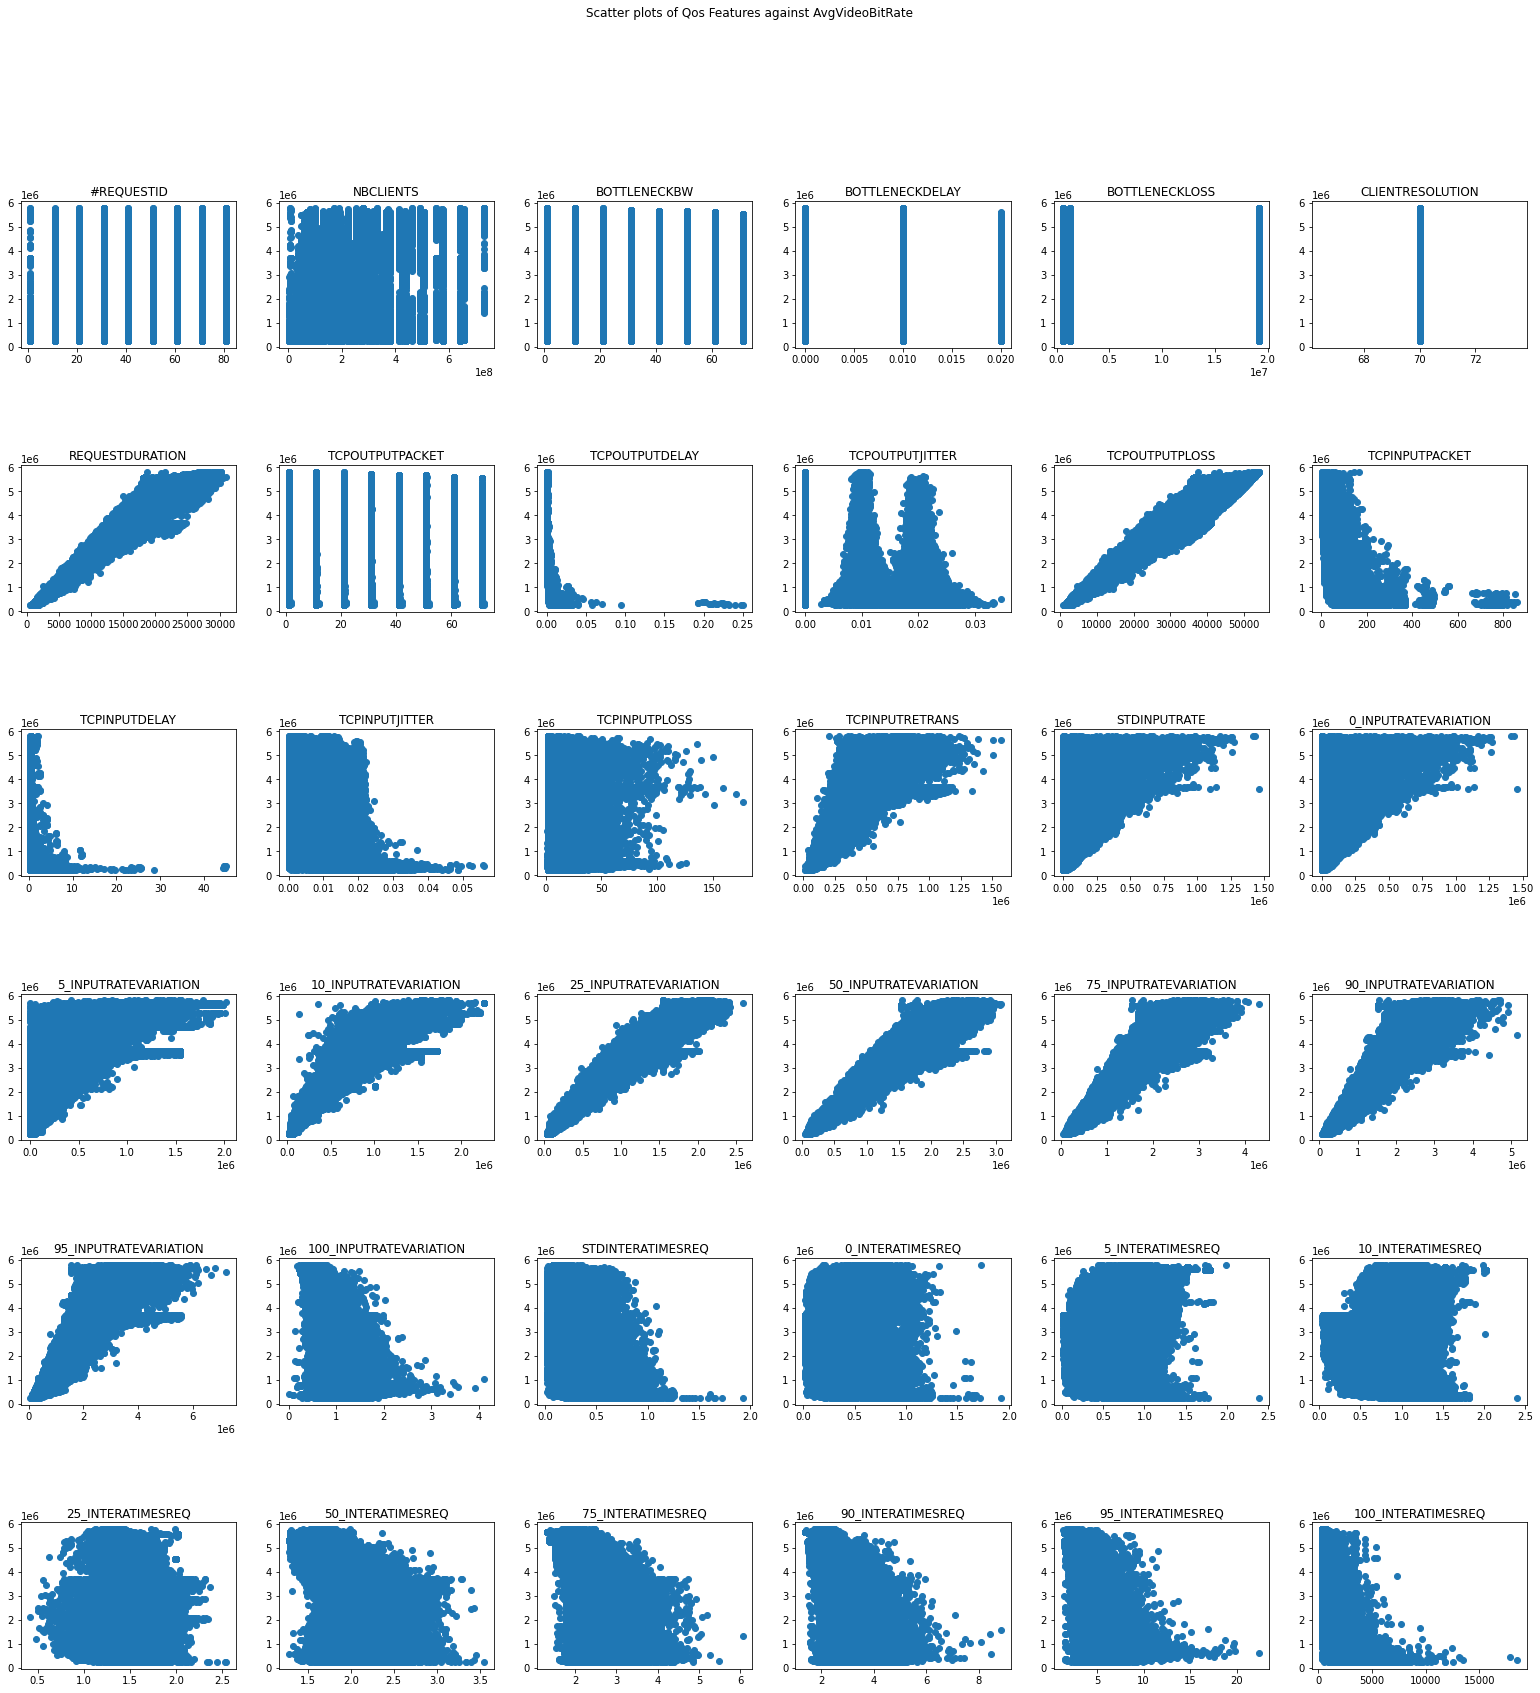

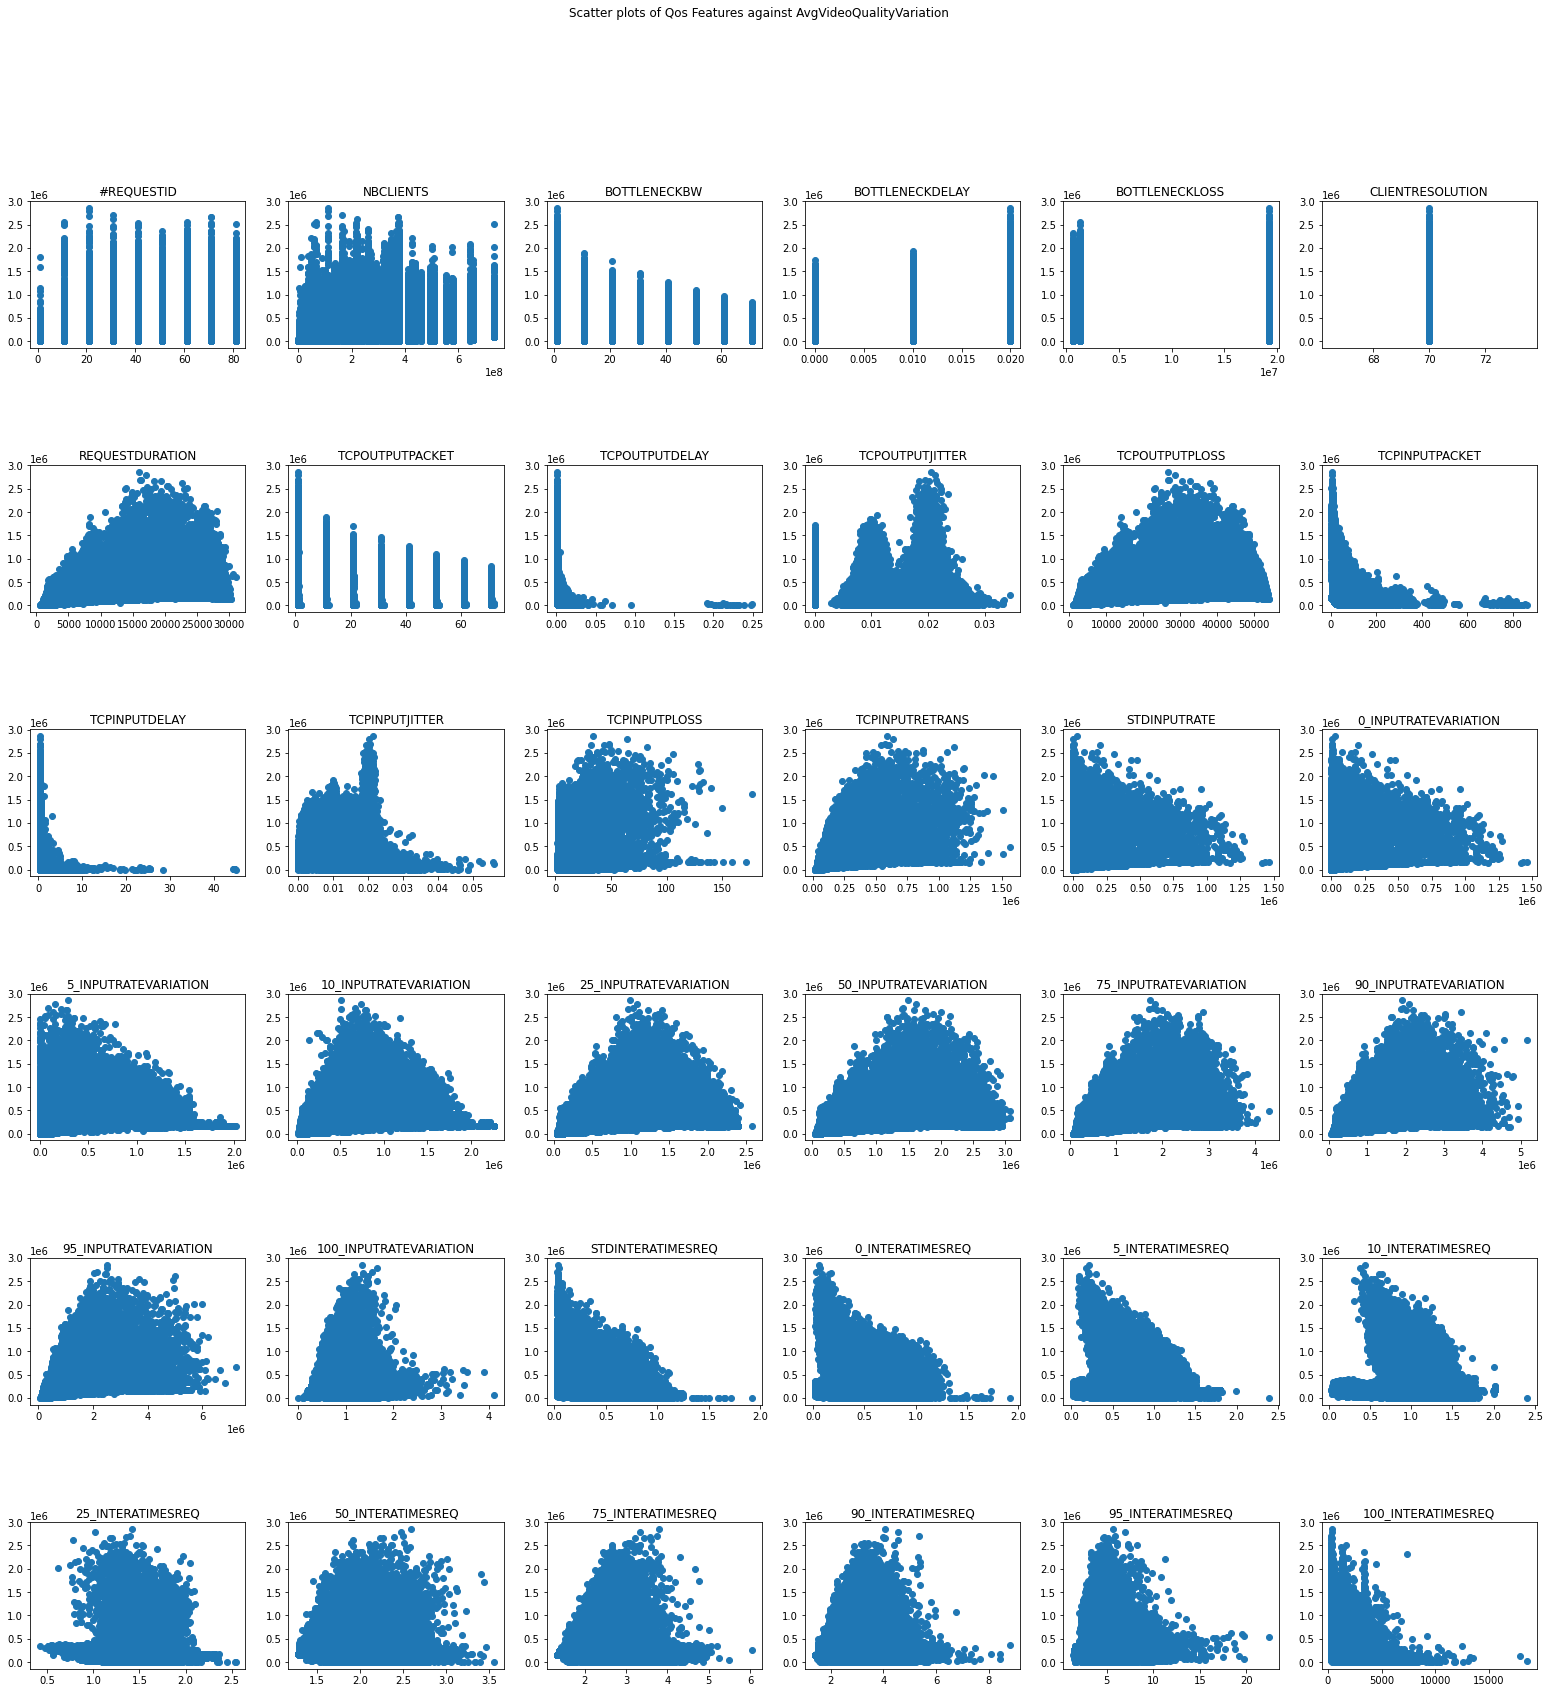

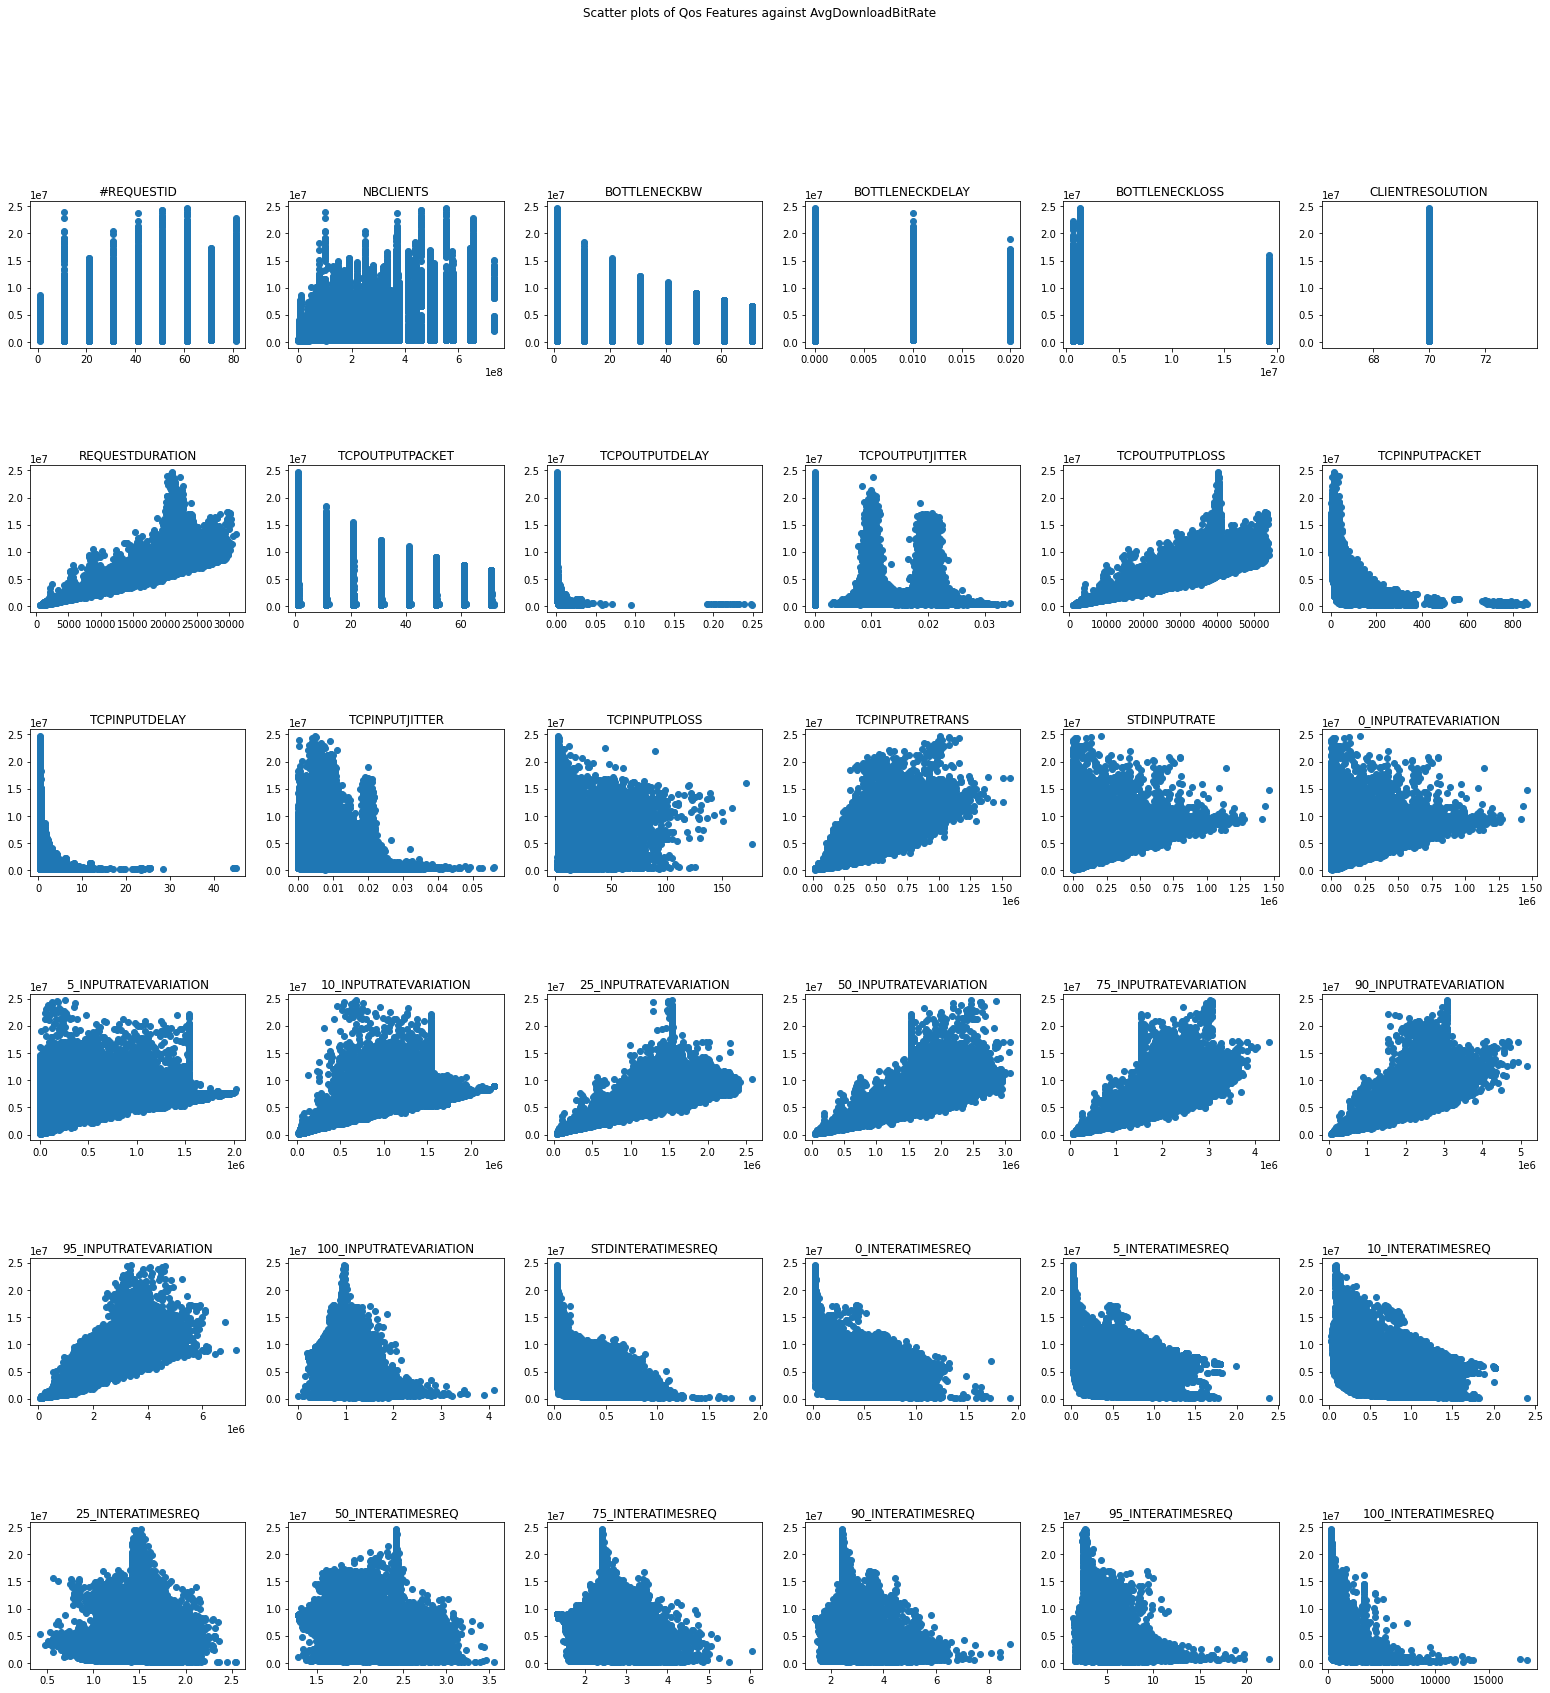

In [20]:
# A scatter plot of all the qos against each qoe to visualize their relationship 
for col in qoe:
    fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(27, 27))
    fig.subplots_adjust(hspace=0.8)
    fig.suptitle(f'Scatter plots of Qos Features against {col}')
    

    for ax, feature, name in zip(axes.flatten(), X.values.T, df.columns.values):
        ax.scatter(x=feature, y=df[col].values.T)
        ax.set(title=name.upper())
    #plt.savefig(f'../QoS/images/{col}.png')

Text(0.5, 1.0, 'Correlation Heatmap')

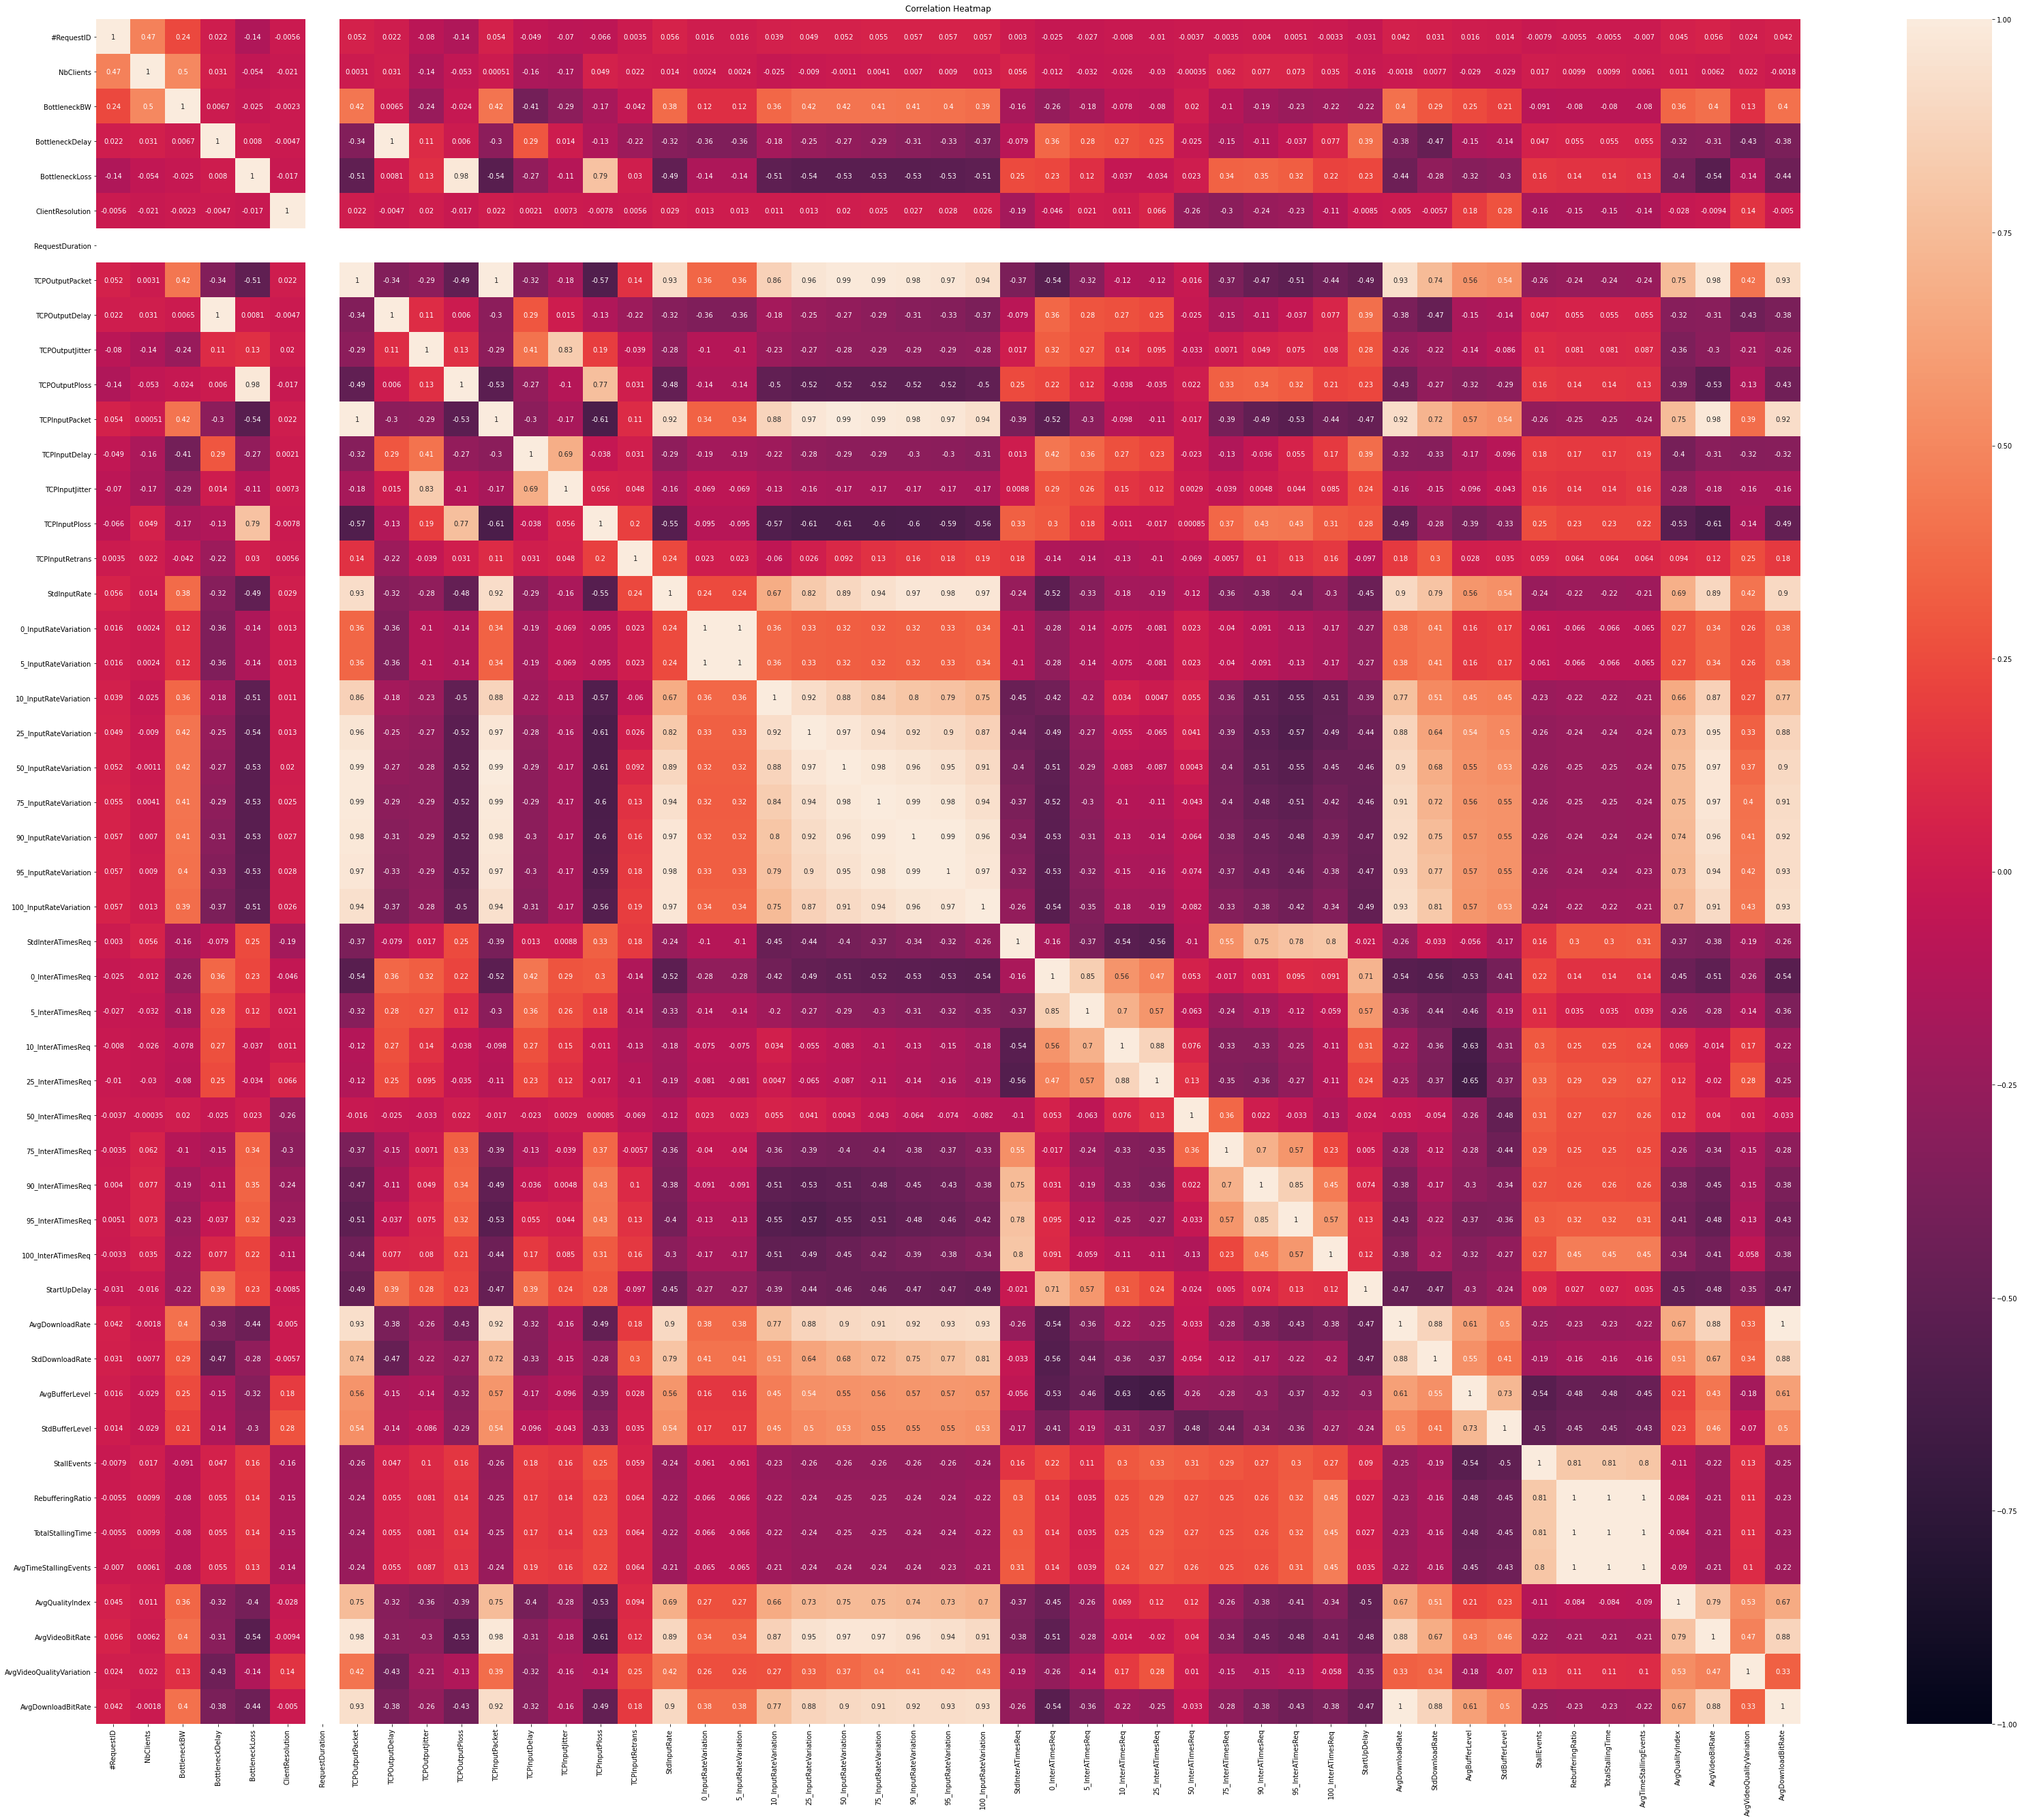

In [21]:
# Correlation matrix to statistically figure out multiple colinearity and variable that doesn't correlate with the target.
plt.figure(figsize=(56, 46))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
#plt.savefig('../QoS/images/correlation_marix.png')

In [22]:
# We have so many qoe, let's talk one now first; that is StartUpDelay
Y = df['StartUpDelay'].values

In [23]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=24)

In [24]:
# Data scaling (Data transformation to make it normal)
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)

In [25]:
# Training
regressor = SupervisedDBNRegression(hidden_layers_structure=[100],
                                    learning_rate_rbm=0.01,
                                    learning_rate=0.00001,
                                    n_epochs_rbm=20,
                                    n_iter_backprop=200,
                                    batch_size=20,
                                    activation_function='relu')

In [26]:
# Fitting
regressor.fit(X_train, Y_train)

[START] Pre-training step:
>> Epoch 1 finished 	RBM Reconstruction error 0.201754
>> Epoch 2 finished 	RBM Reconstruction error 0.178179
>> Epoch 3 finished 	RBM Reconstruction error 0.163860
>> Epoch 4 finished 	RBM Reconstruction error 0.167963
>> Epoch 5 finished 	RBM Reconstruction error 0.158659
>> Epoch 6 finished 	RBM Reconstruction error 0.154367
>> Epoch 7 finished 	RBM Reconstruction error 0.150694
>> Epoch 8 finished 	RBM Reconstruction error 0.150221
>> Epoch 9 finished 	RBM Reconstruction error 0.145475
>> Epoch 10 finished 	RBM Reconstruction error 0.141618
>> Epoch 11 finished 	RBM Reconstruction error 0.139332
>> Epoch 12 finished 	RBM Reconstruction error 0.138227
>> Epoch 13 finished 	RBM Reconstruction error 0.139100
>> Epoch 14 finished 	RBM Reconstruction error 0.134744
>> Epoch 15 finished 	RBM Reconstruction error 0.137670
>> Epoch 16 finished 	RBM Reconstruction error 0.133742
>> Epoch 17 finished 	RBM Reconstruction error 0.134959
>> Epoch 18 finished 	RBM Reco

SupervisedDBNRegression()

In [27]:
# scaling the Test data
X_test = min_max_scaler.transform(X_test)

In [28]:
# Prediction
Y_pred = regressor.predict(X_test)

In [29]:
# And here comes our R-Squared, very perfect and series of fine-tunning we have done. Also very low MSE
print('Done.\nR-squared: %f\nMSE: %f' % (r2_score(Y_test, Y_pred), mean_squared_error(Y_test, Y_pred)))

Done.
R-squared: 1.000000
MSE: 0.053146


In [30]:
# Our predicted qoe value for StartUpDelay
Y_pred

array([[1194.69117616],
       [ 524.10234624],
       [1526.97753677],
       ...,
       [1485.03685813],
       [ 522.01704978],
       [1643.95396198]])

In [39]:
# Let's compare actual versus predicted.
print('Actual     Predicted')
for i, j in zip(Y_test, Y_pred):
  print(f'{i}---------{j}')

Streaming output truncated to the last 5000 lines.
1644---------[1644.07482806]
1365---------[1364.97202617]
361---------[361.10265205]
2165---------[2164.93032972]
1581---------[1581.14324974]
493---------[493.02406997]
846---------[845.91836868]
745---------[744.92528458]
355---------[355.0480616]
489---------[489.18370464]
1485---------[1484.98916014]
1713---------[1713.05198484]
2465---------[2464.94026542]
1426---------[1426.14824624]
1486---------[1485.9115521]
905---------[904.9846417]
1645---------[1645.05739646]
558---------[558.07581514]
3868---------[3867.85647896]
625---------[625.108455]
1746---------[1746.04520237]
906---------[906.06879867]
1991---------[1990.95704201]
1066---------[1065.95529578]
1460---------[1459.92675136]
4677---------[4676.73507591]
1085---------[1084.88840625]
3536---------[3535.81877688]
2729---------[2728.95290582]
1005---------[1004.96740831]
4887---------[4886.79176009]
745---------[744.89672339]
1028---------[1028.0172883]
4991---------[4990.8

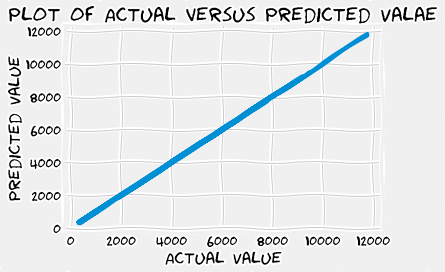

In [45]:
# Plot of Actual versus predicted value reveals a perfectly fitted line.

plt.style.use('fivethirtyeight')
plt.plot(Y_test, Y_pred)
plt.xkcd()
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Plot of Actual versus Predicted Valae')
plt.tight_layout()